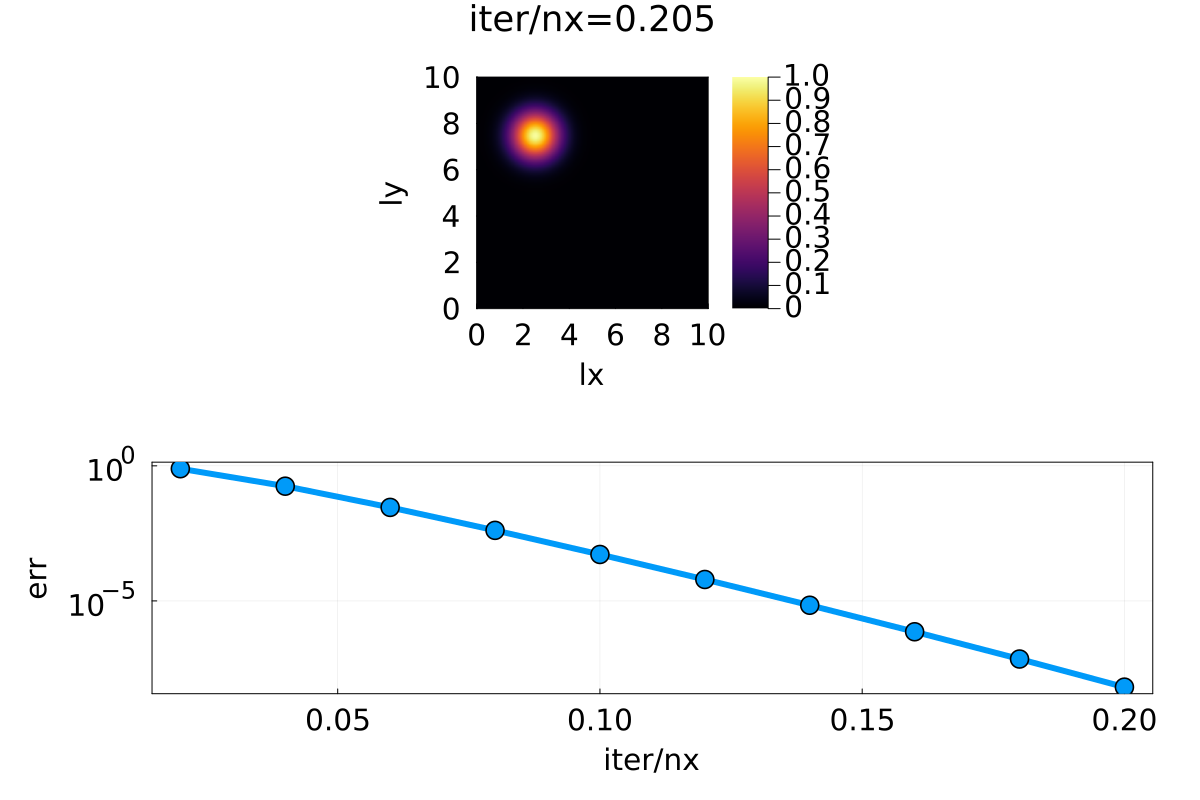

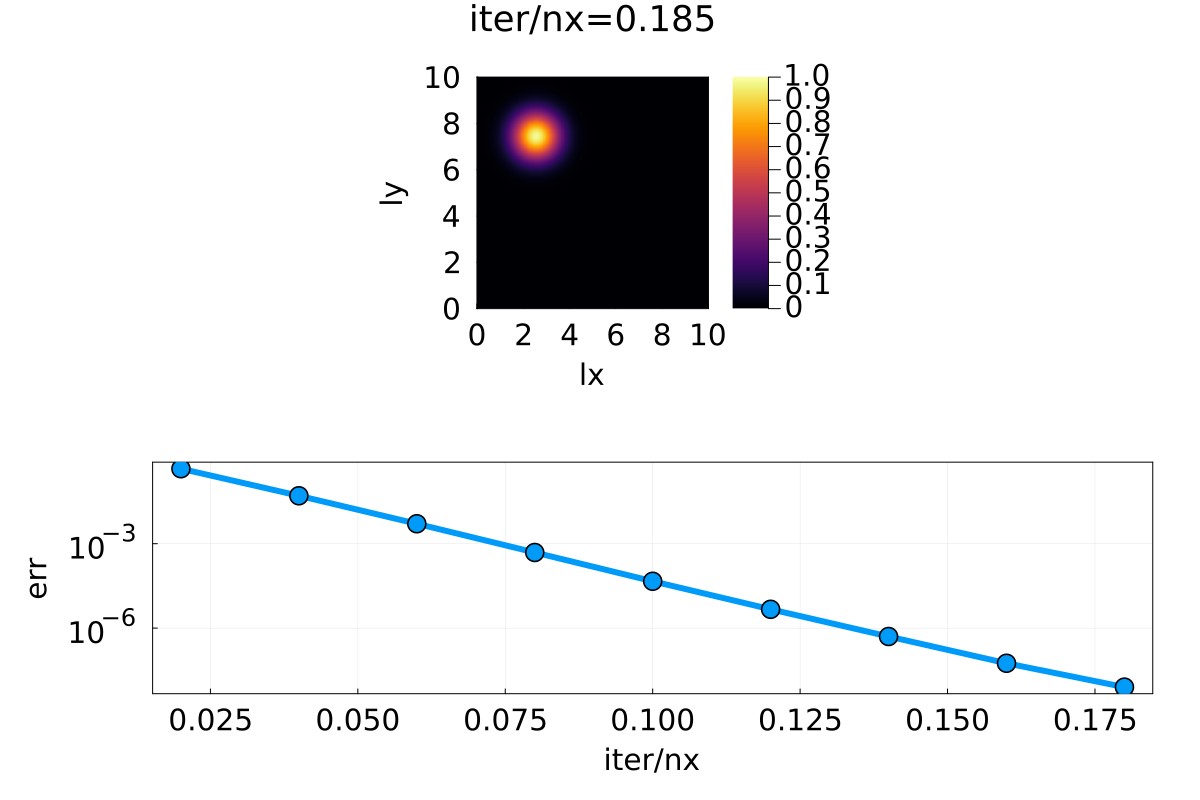

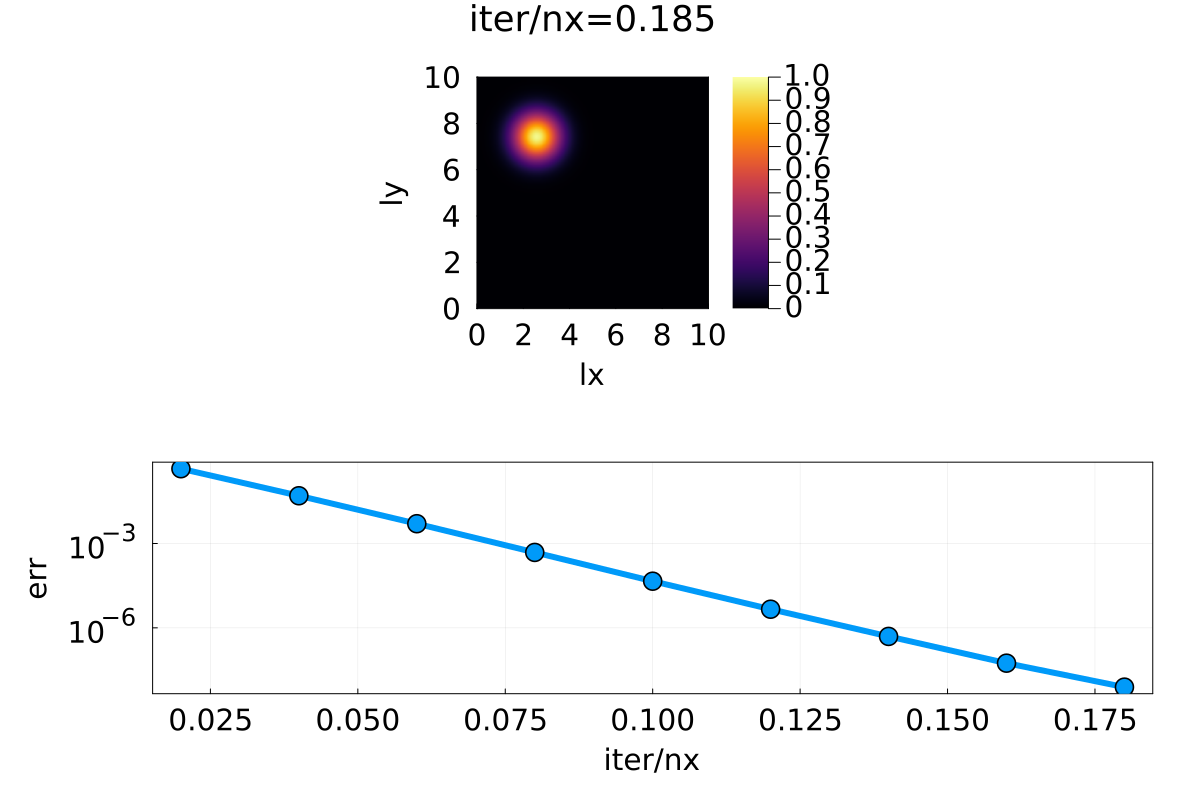

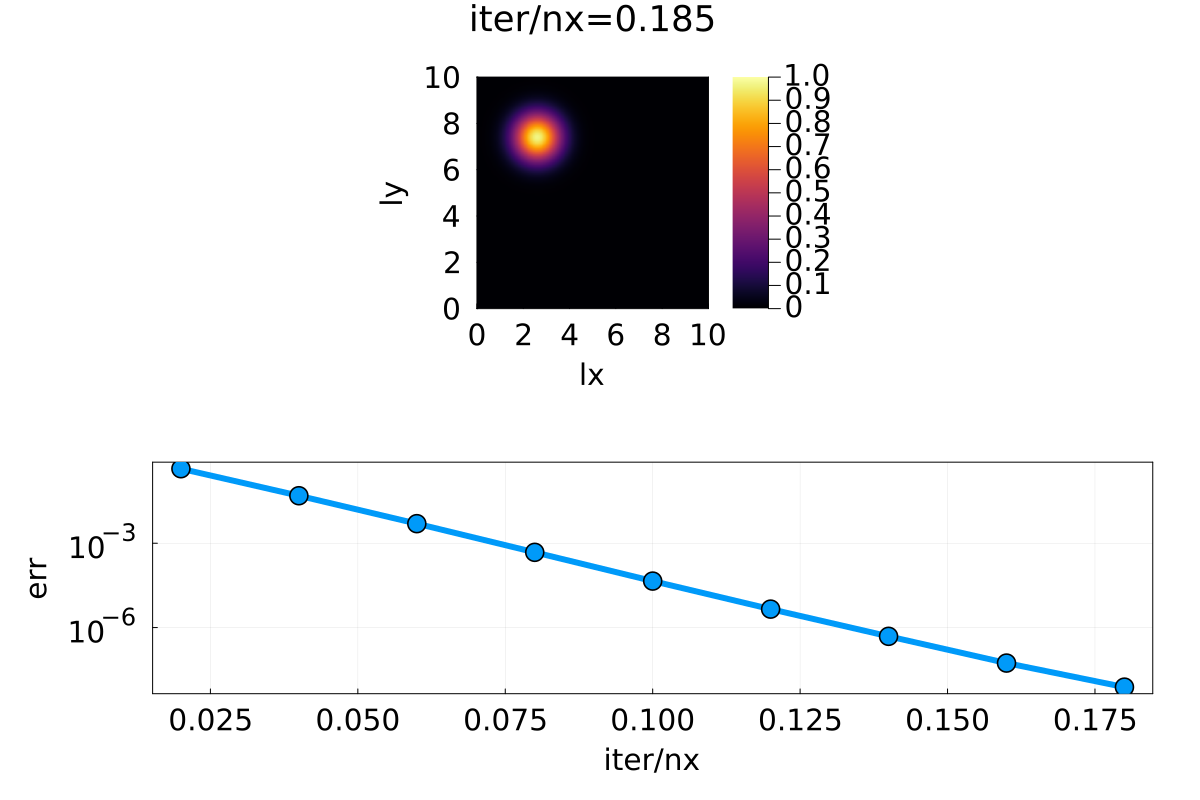

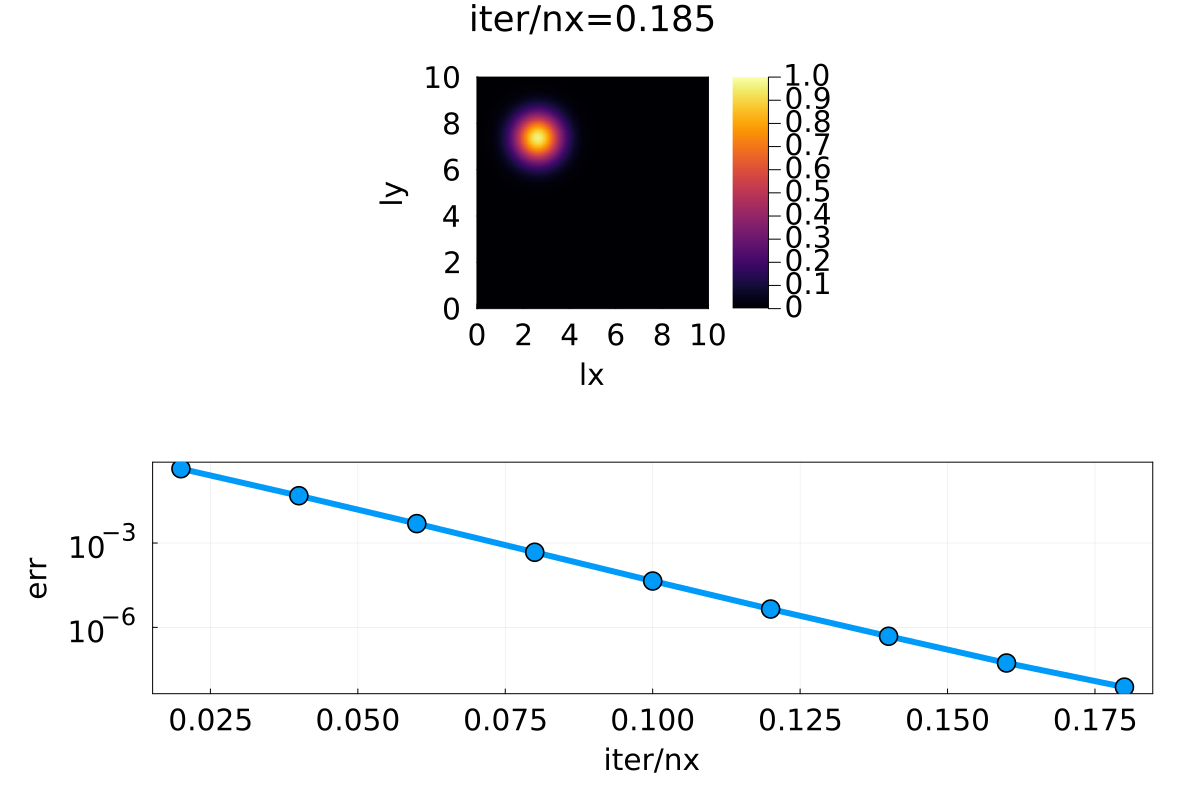

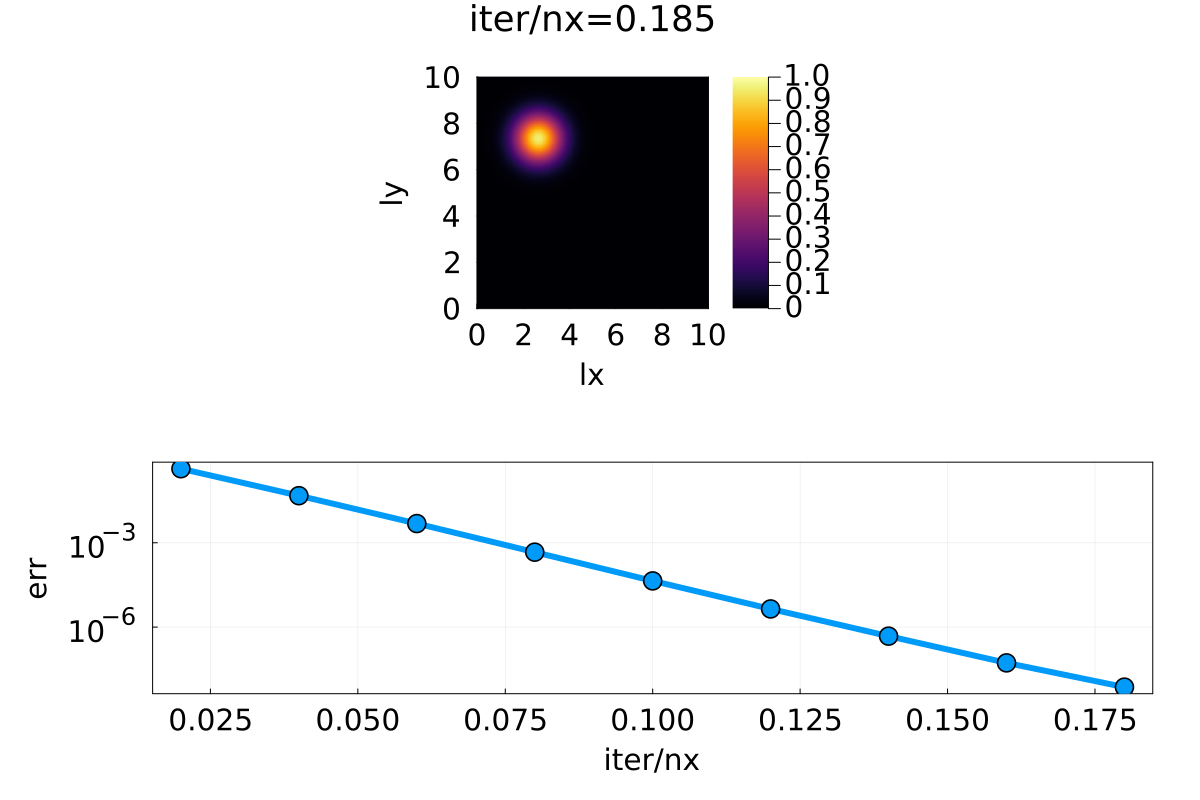

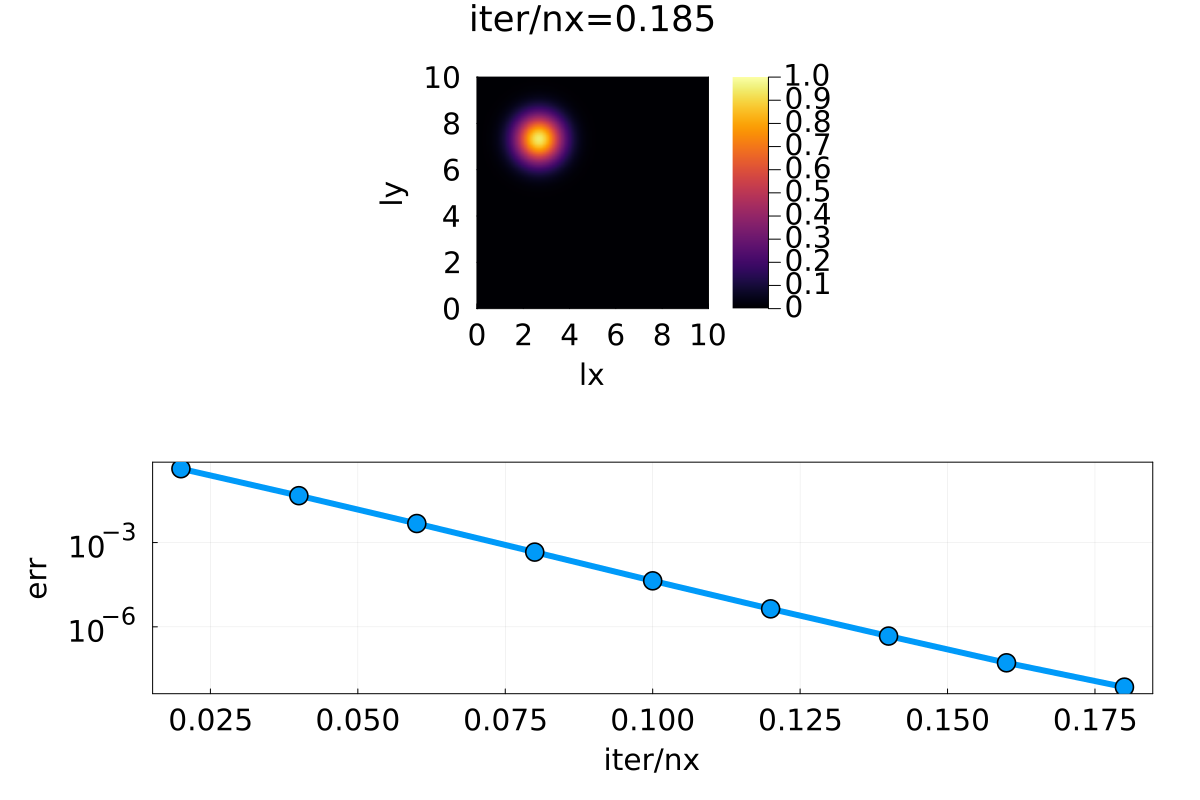

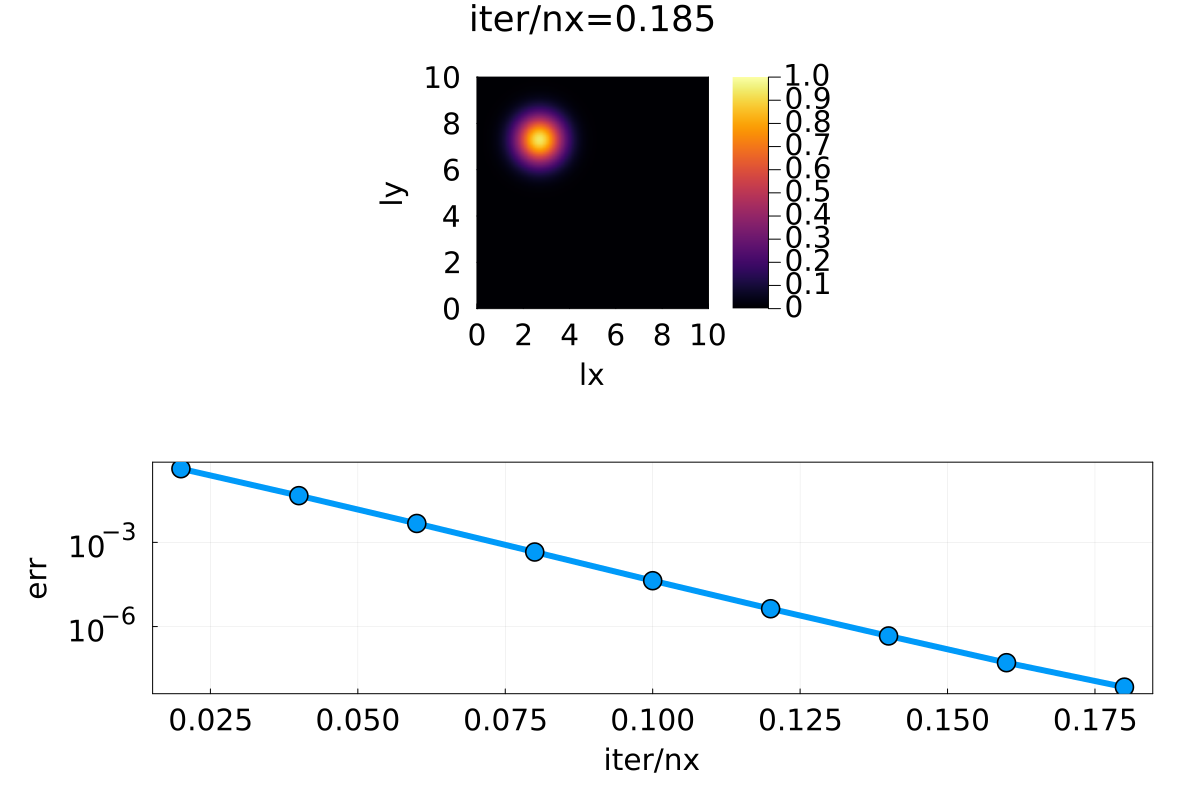

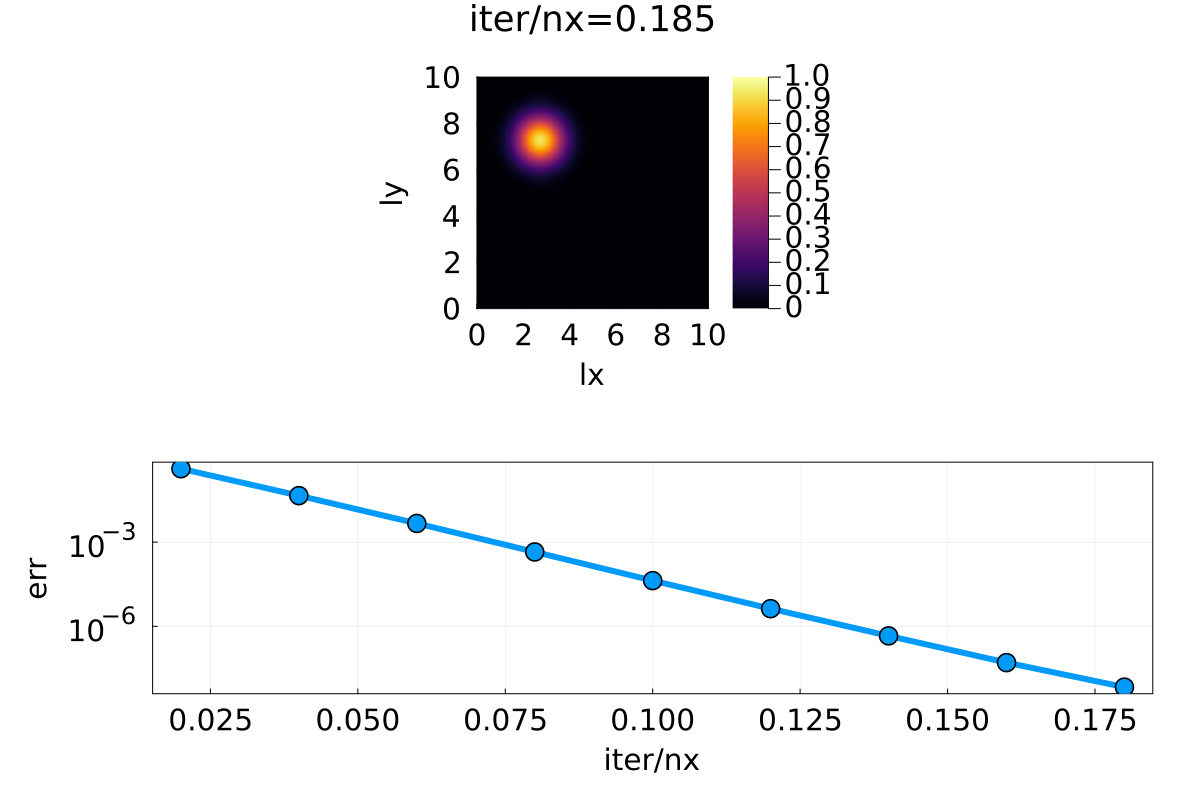

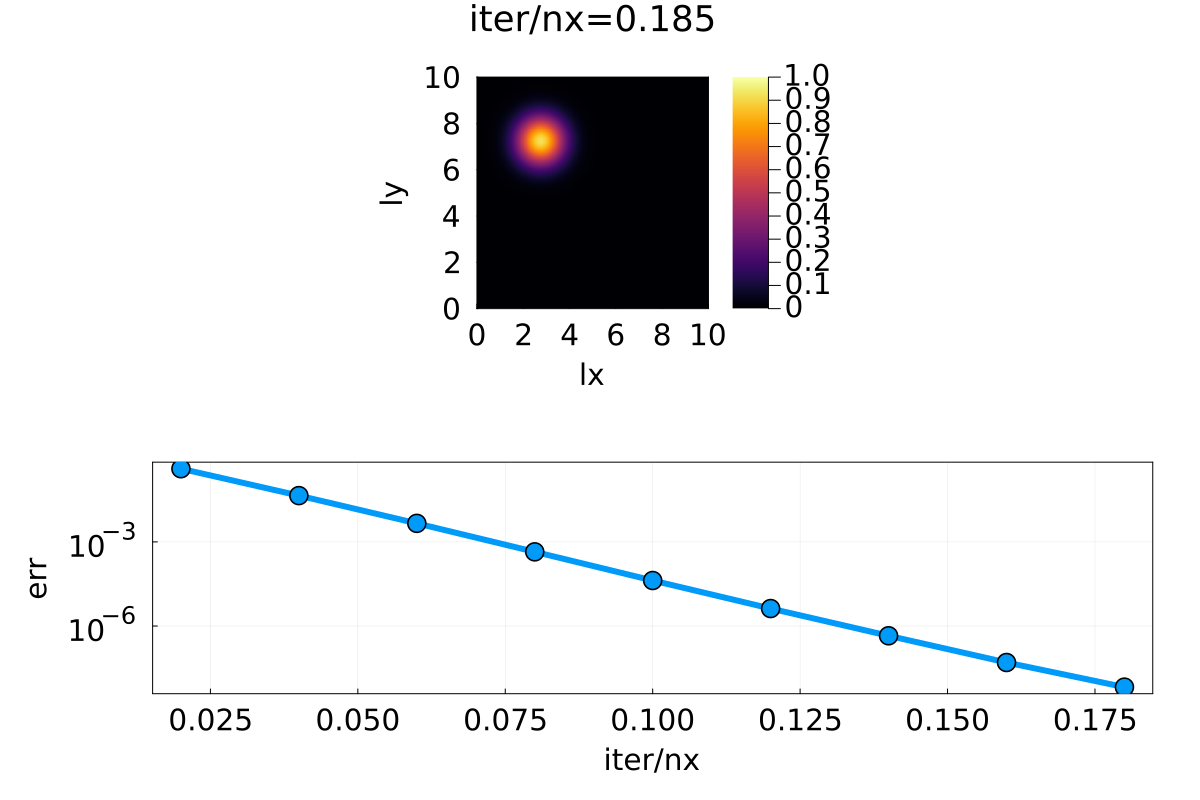

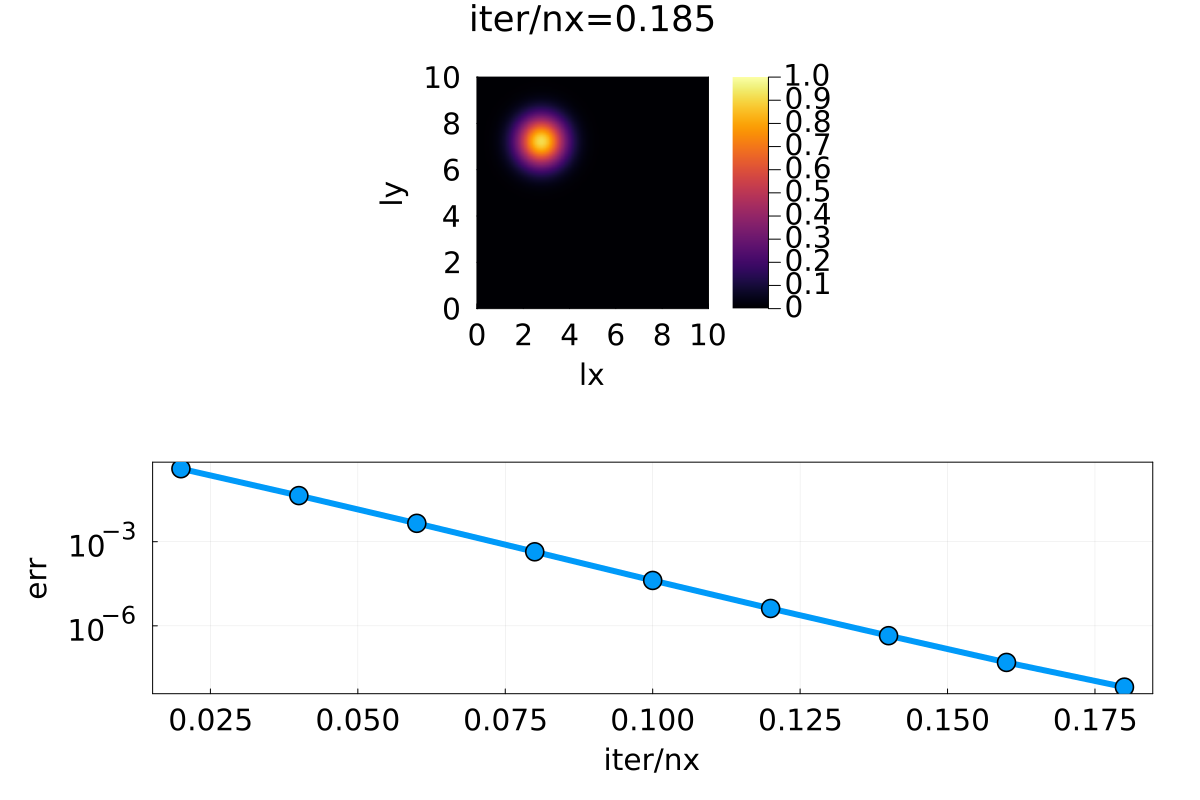

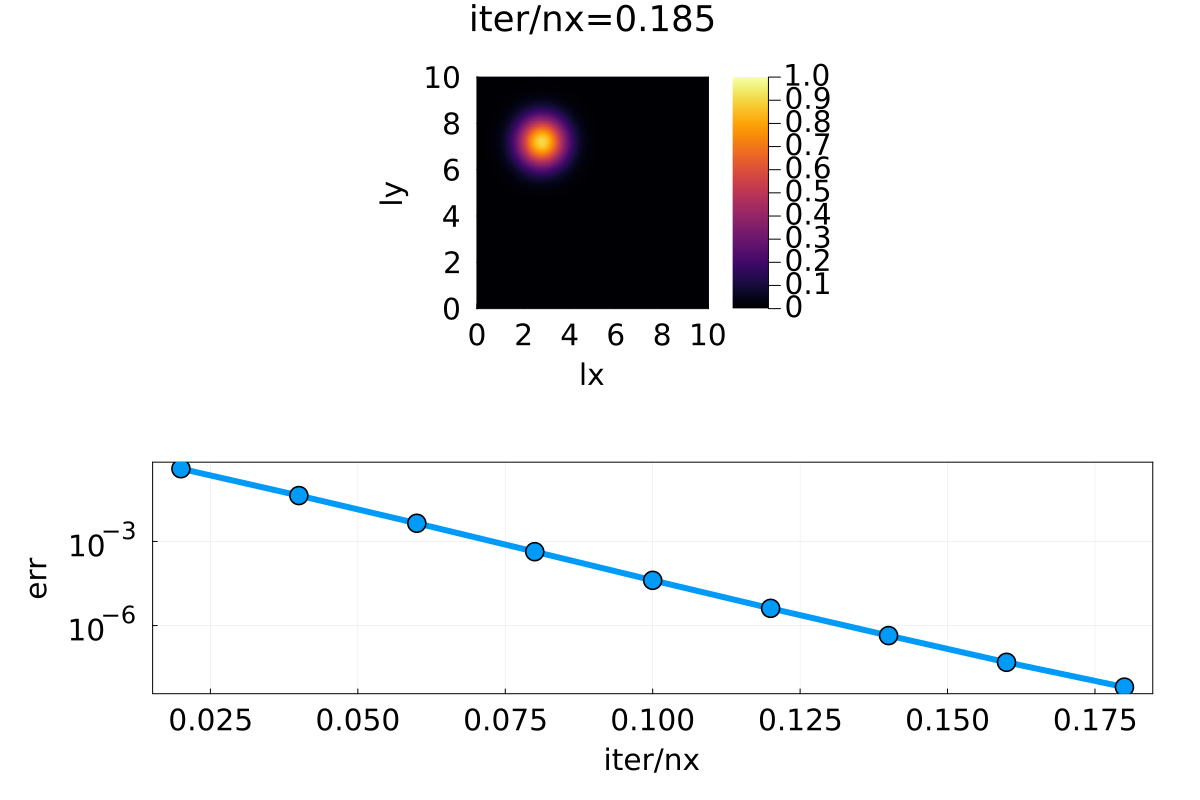

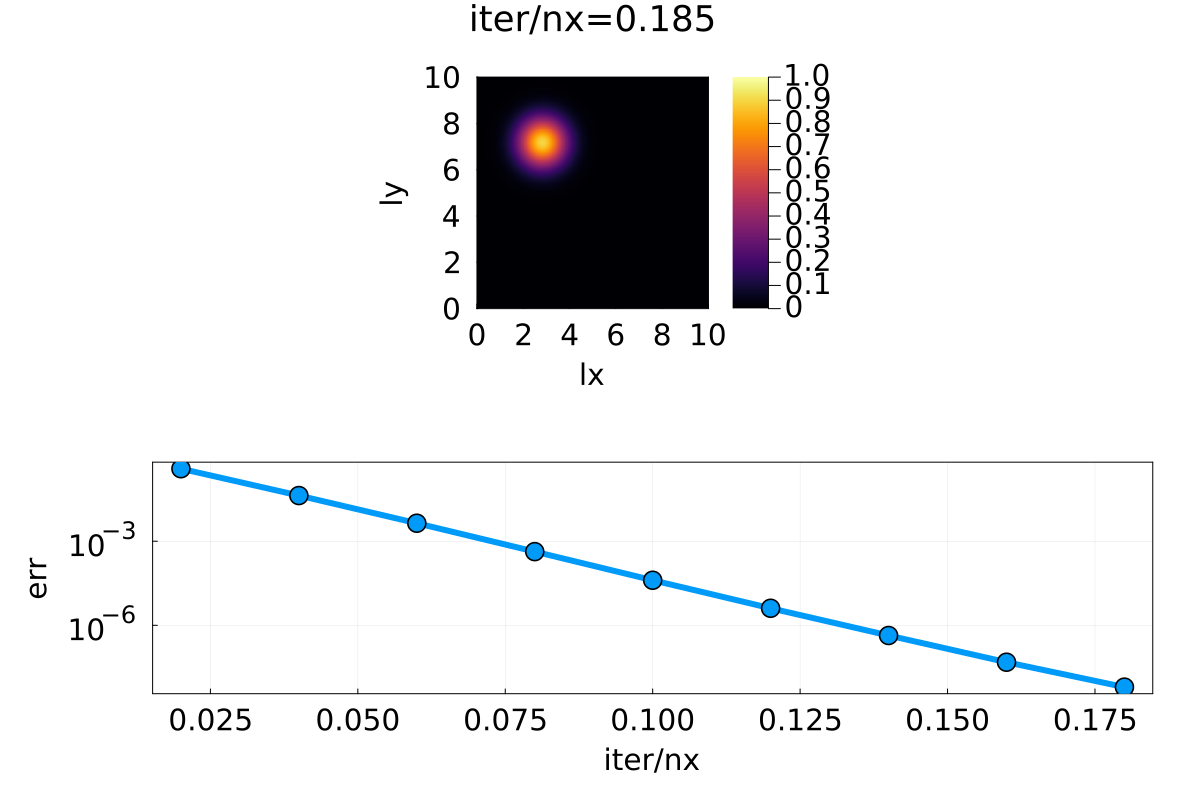

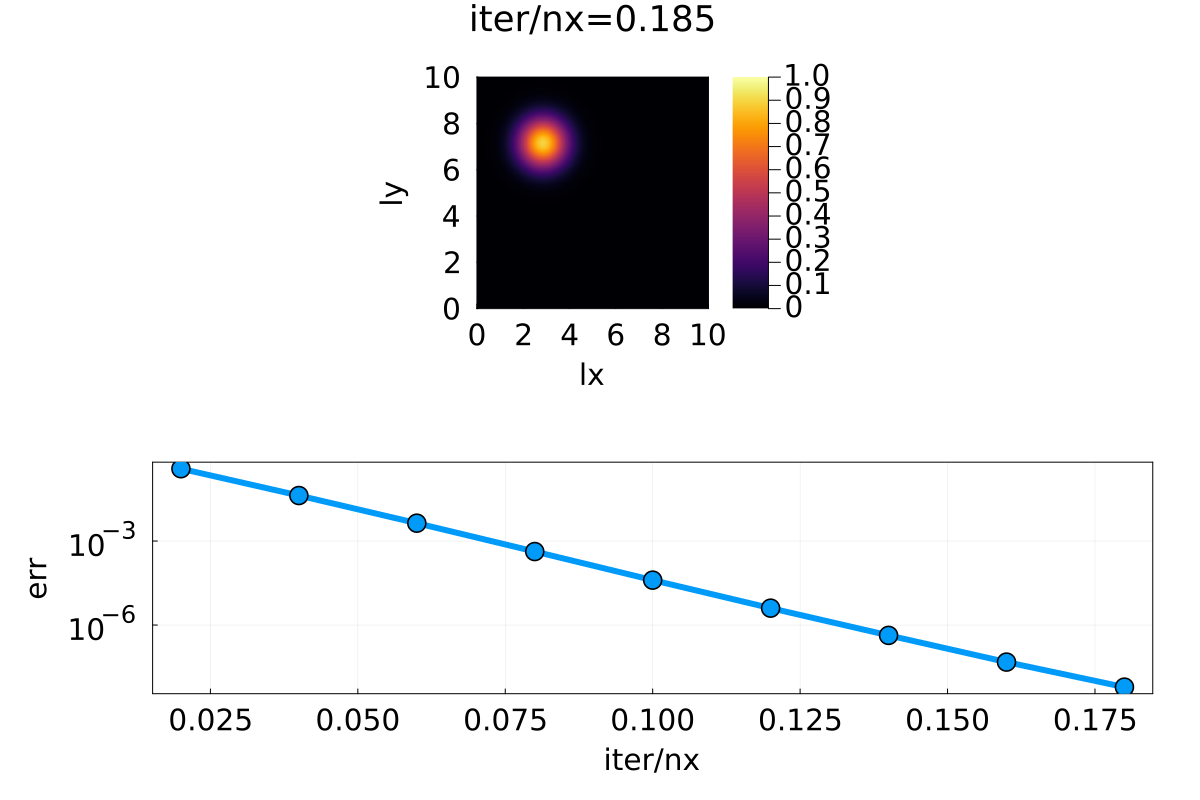

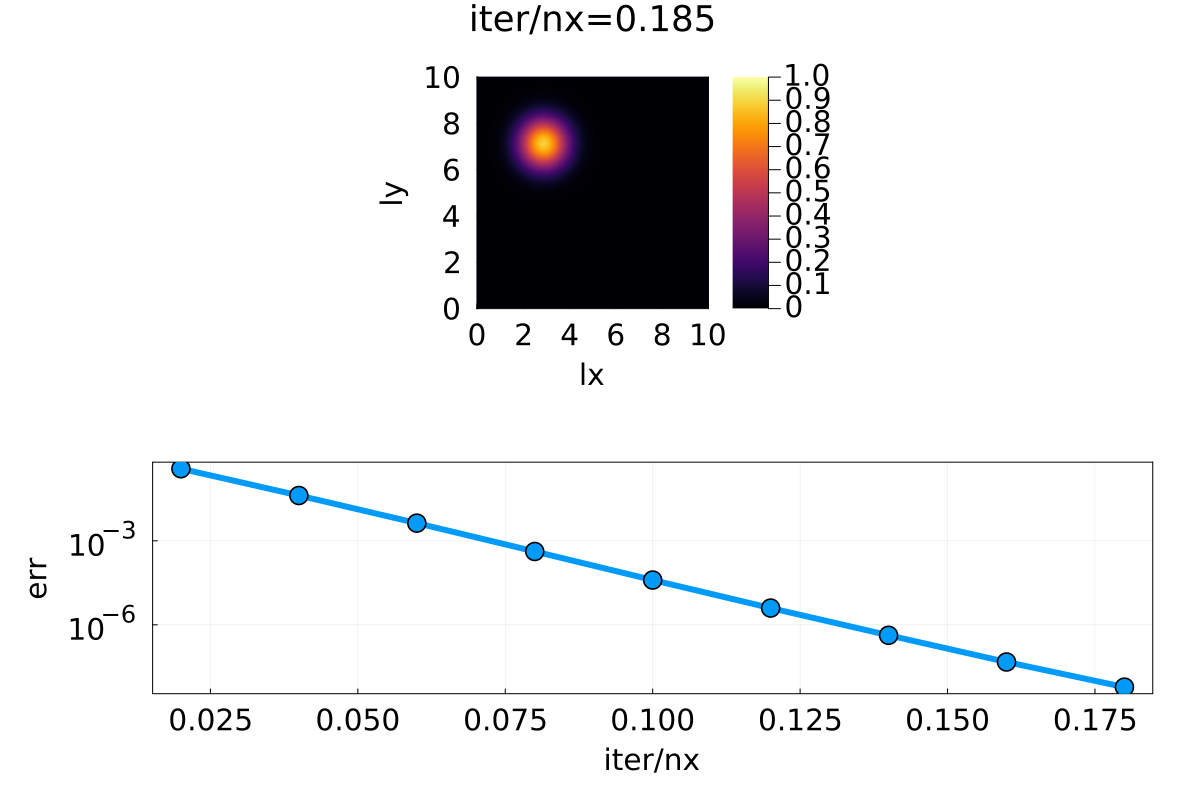

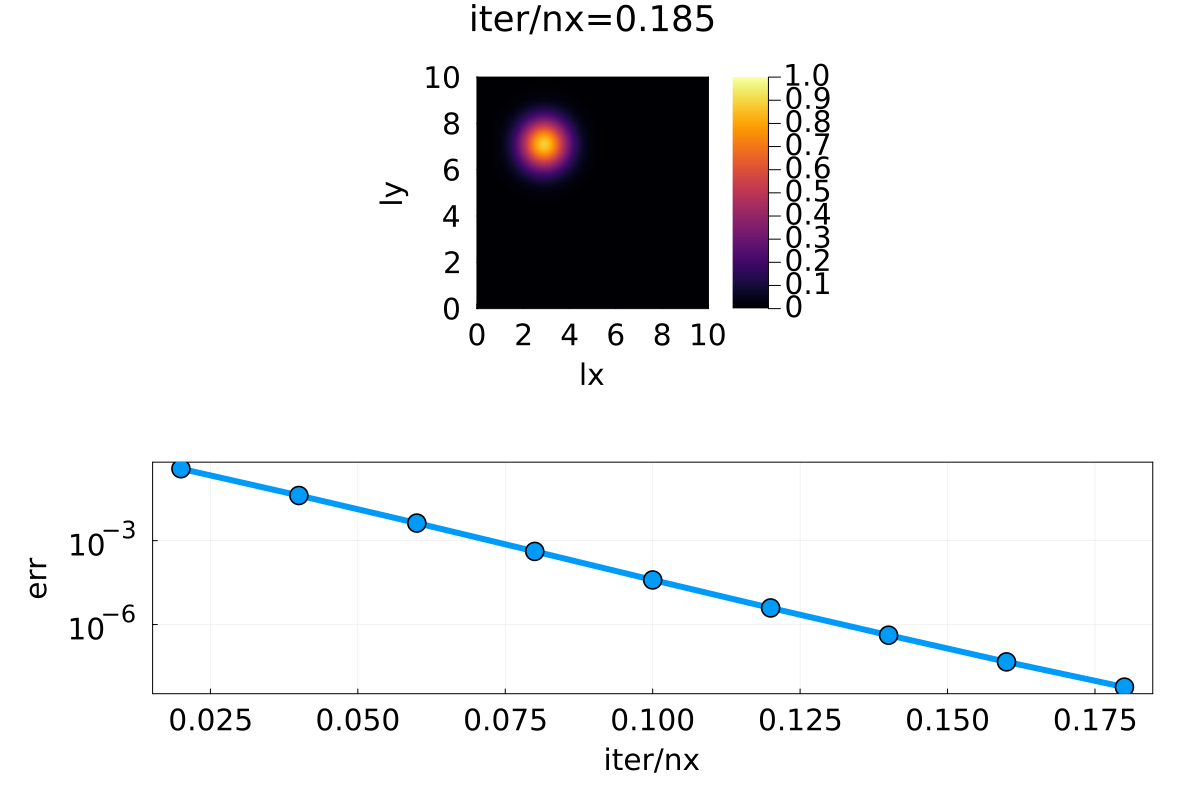

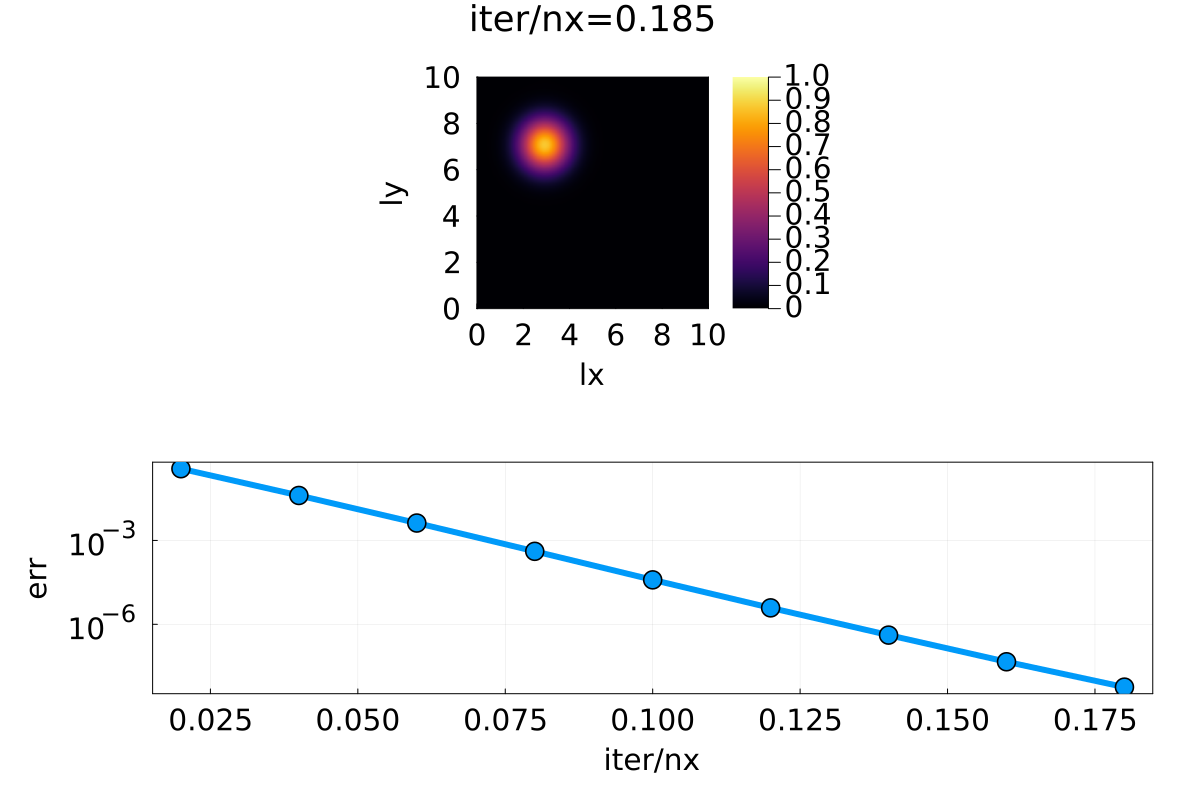

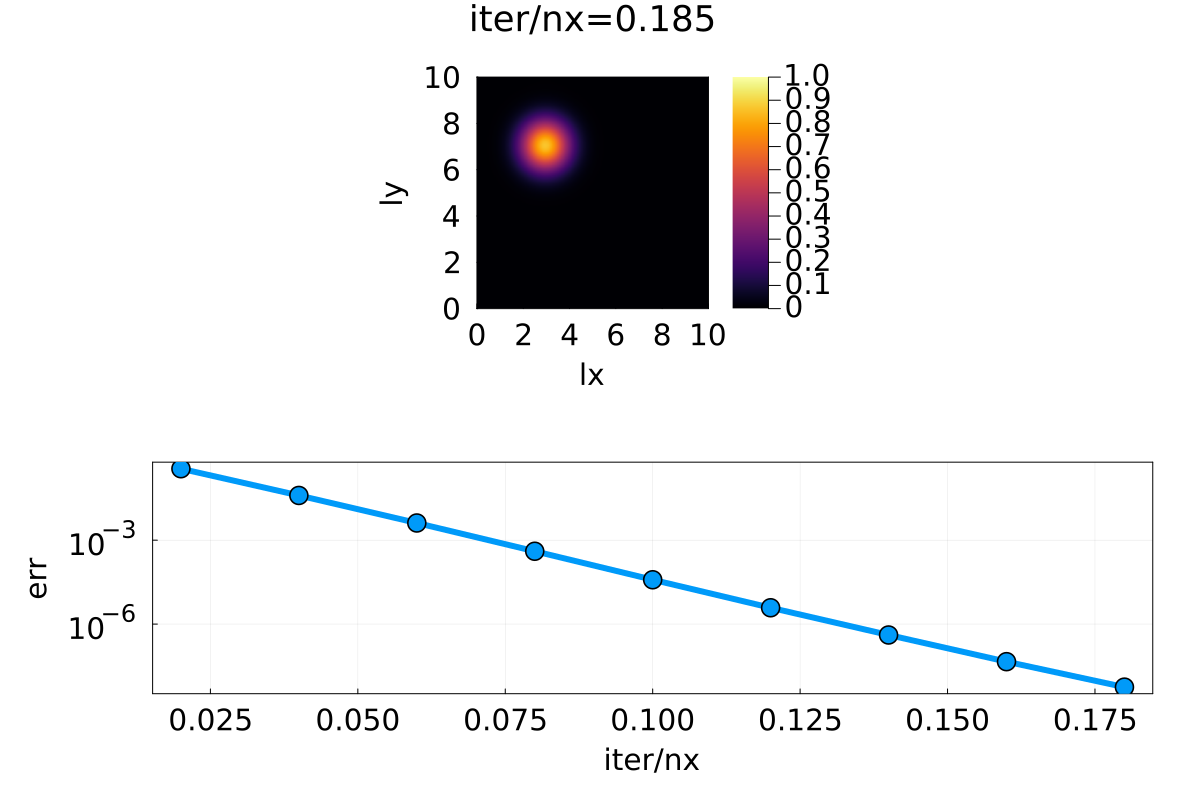

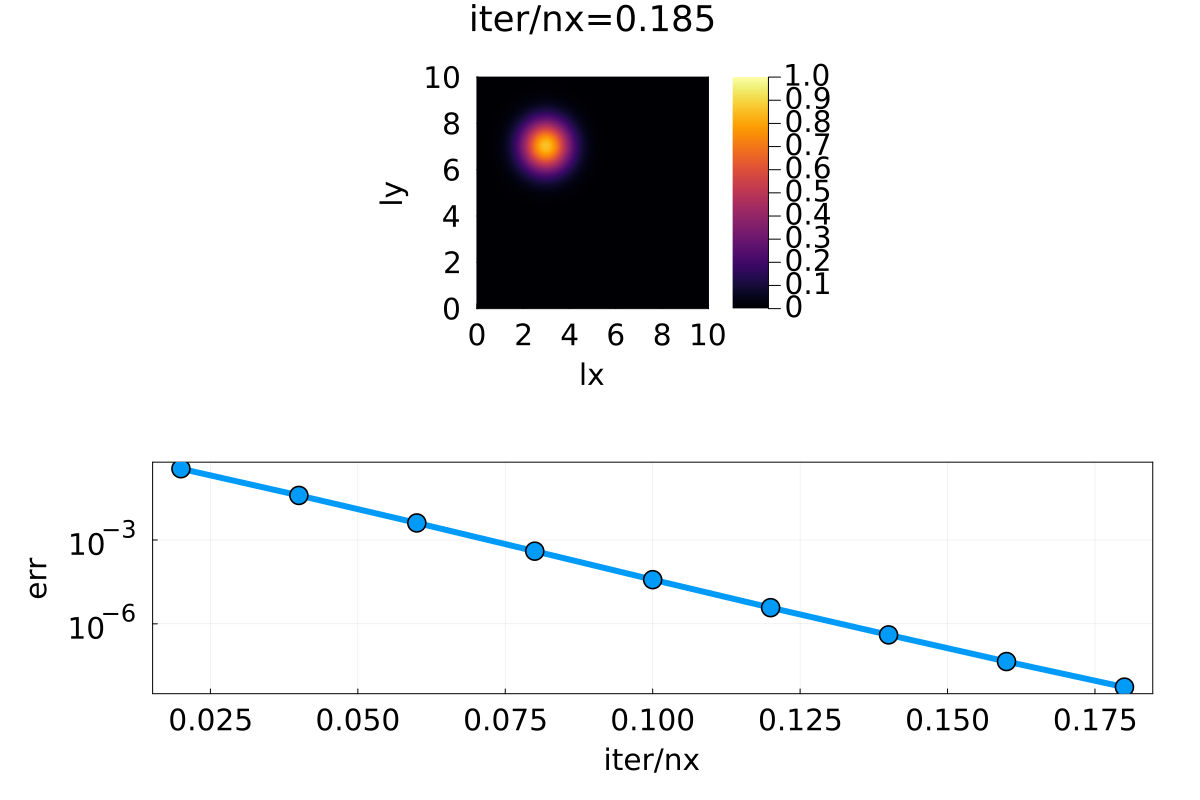

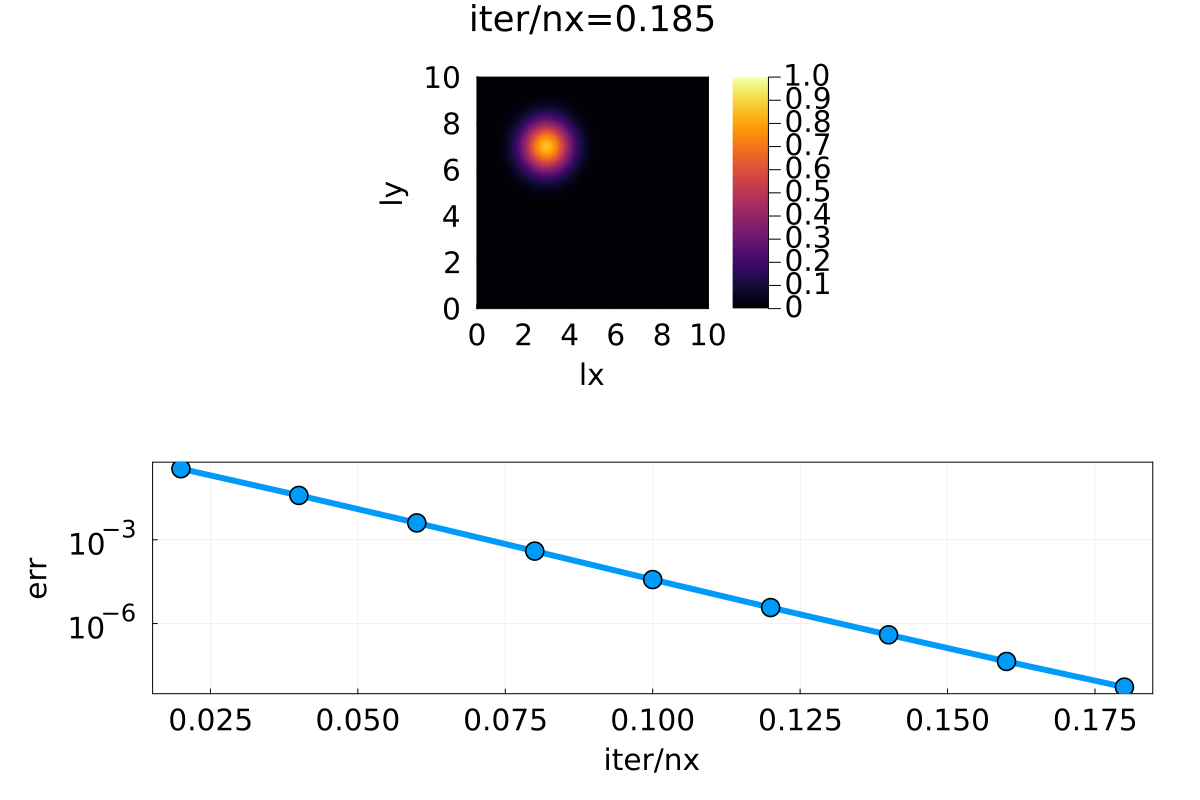

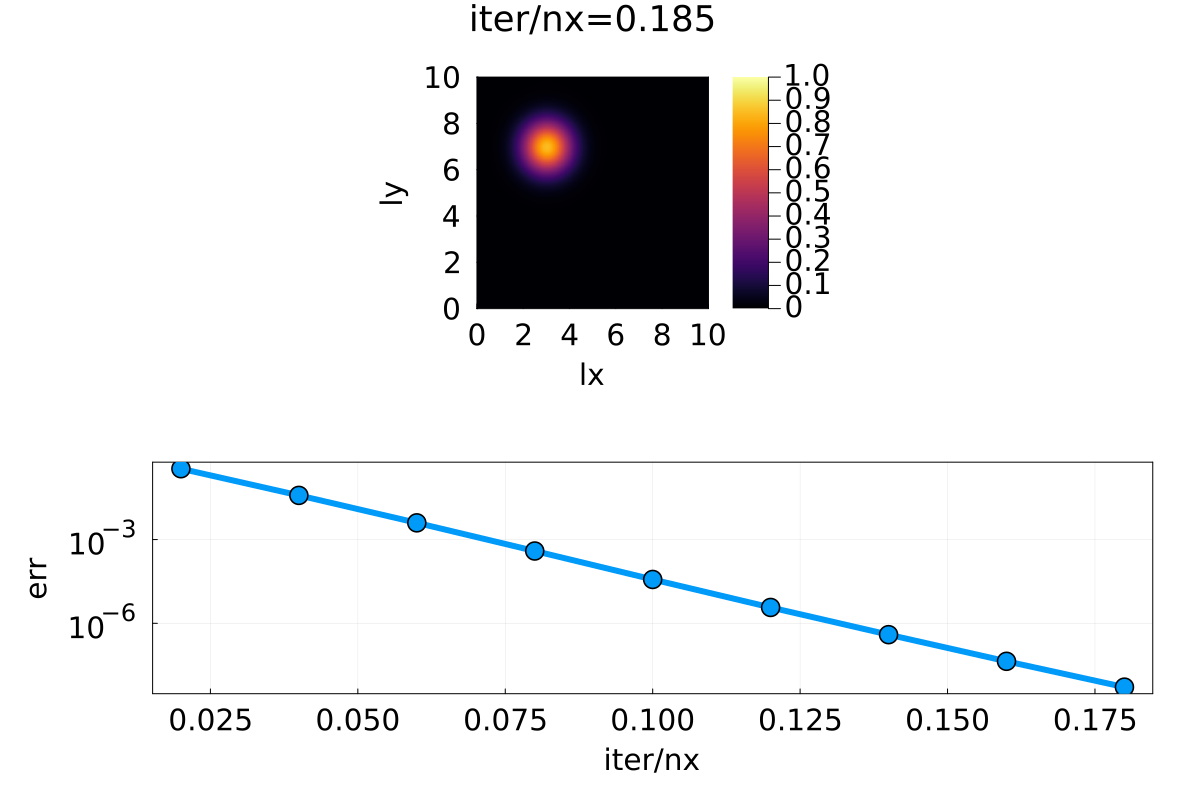

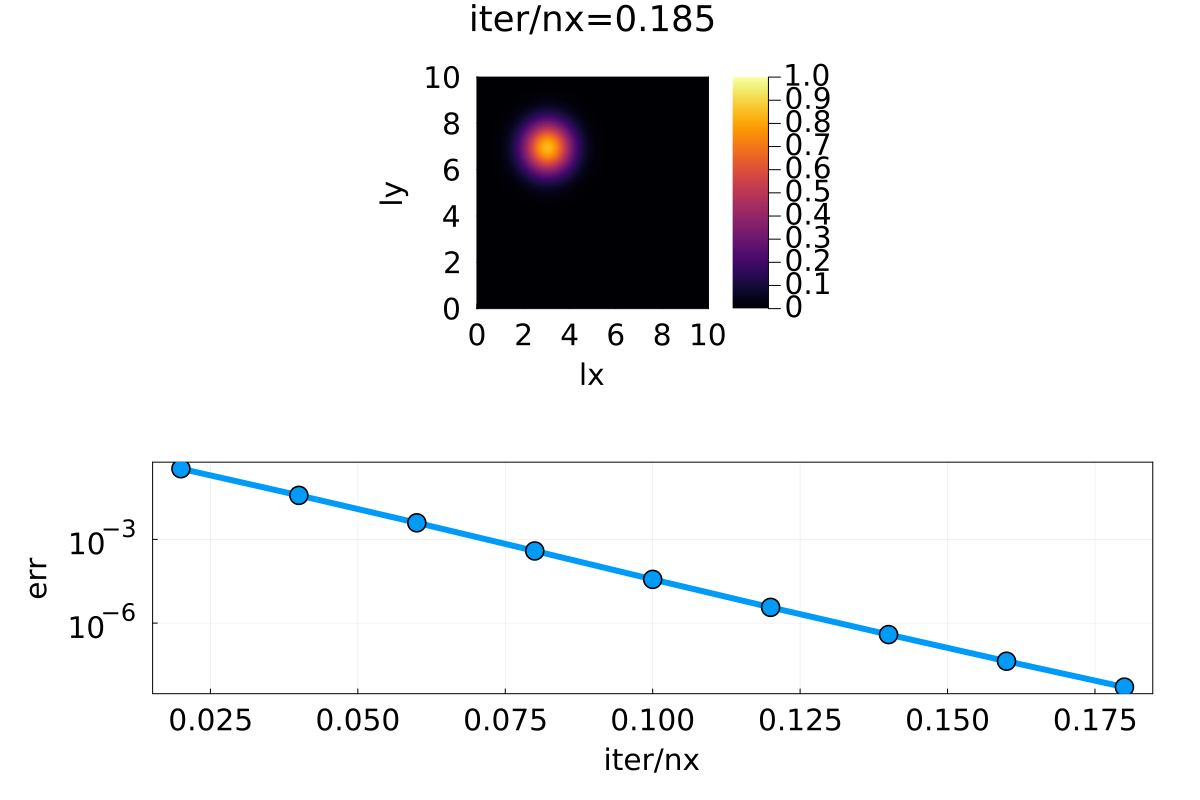

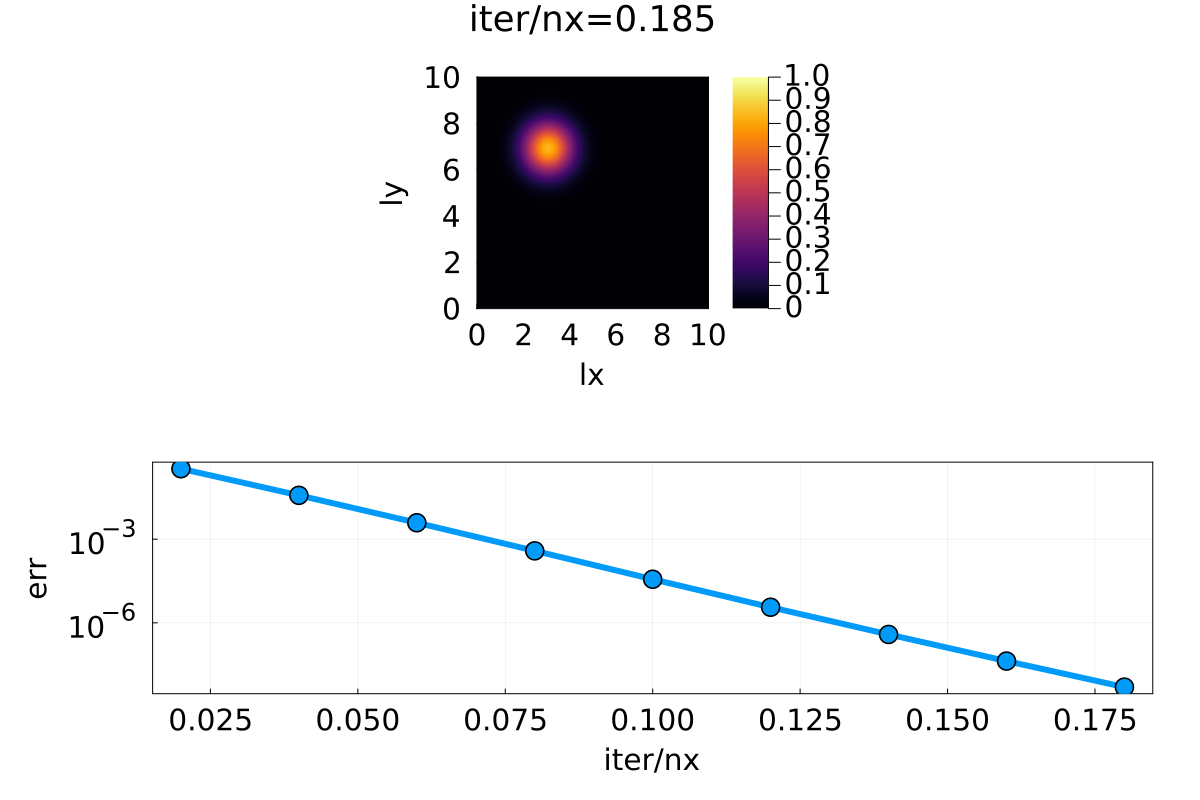

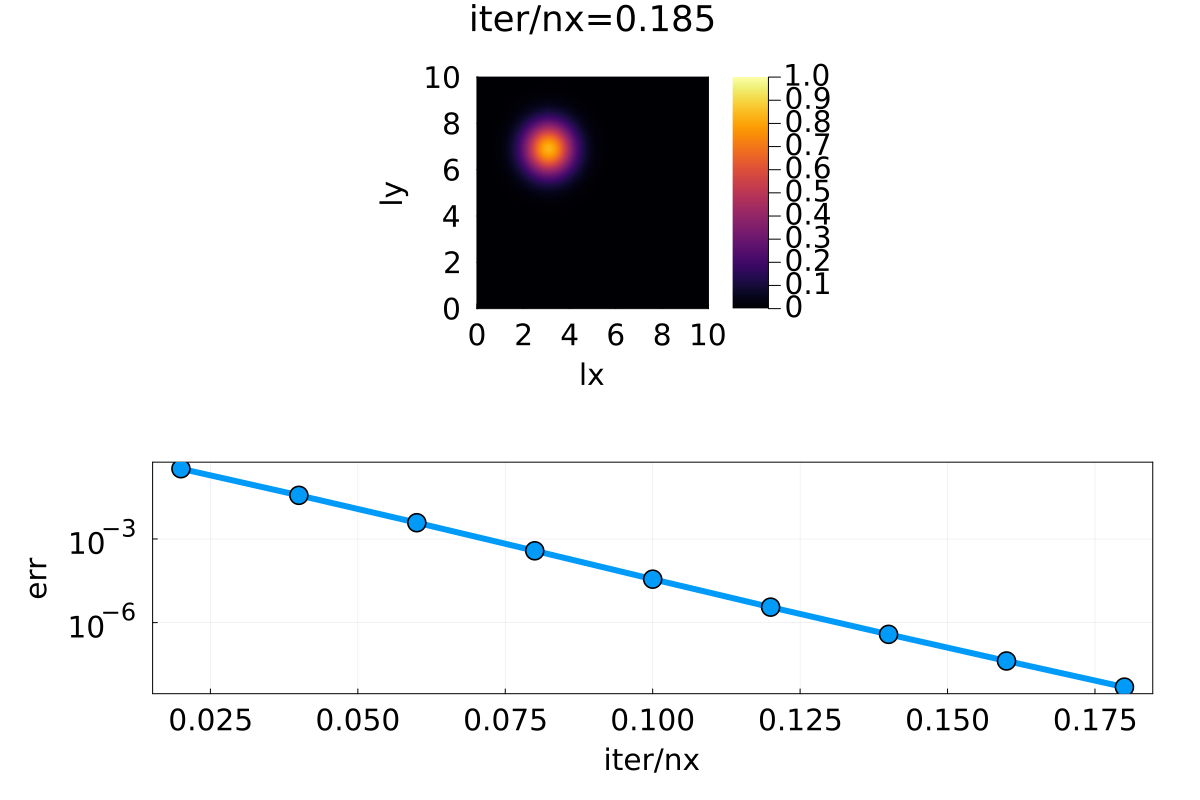

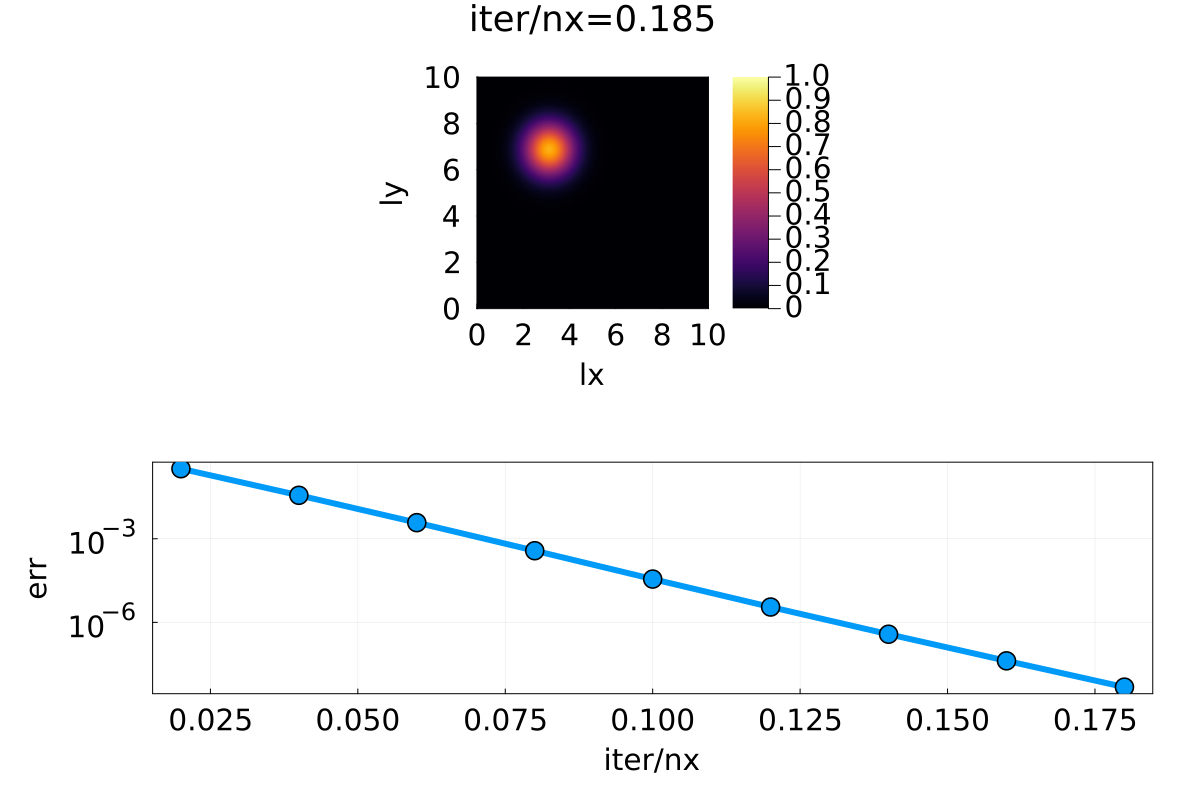

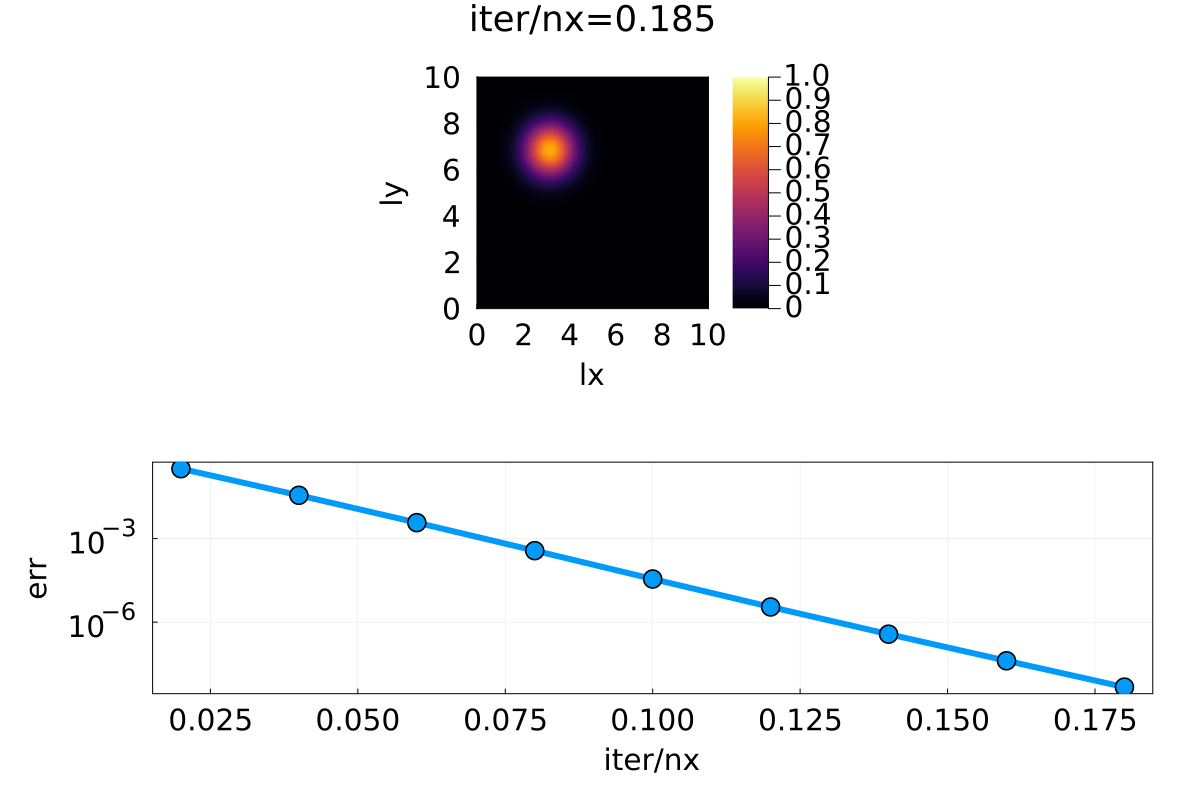

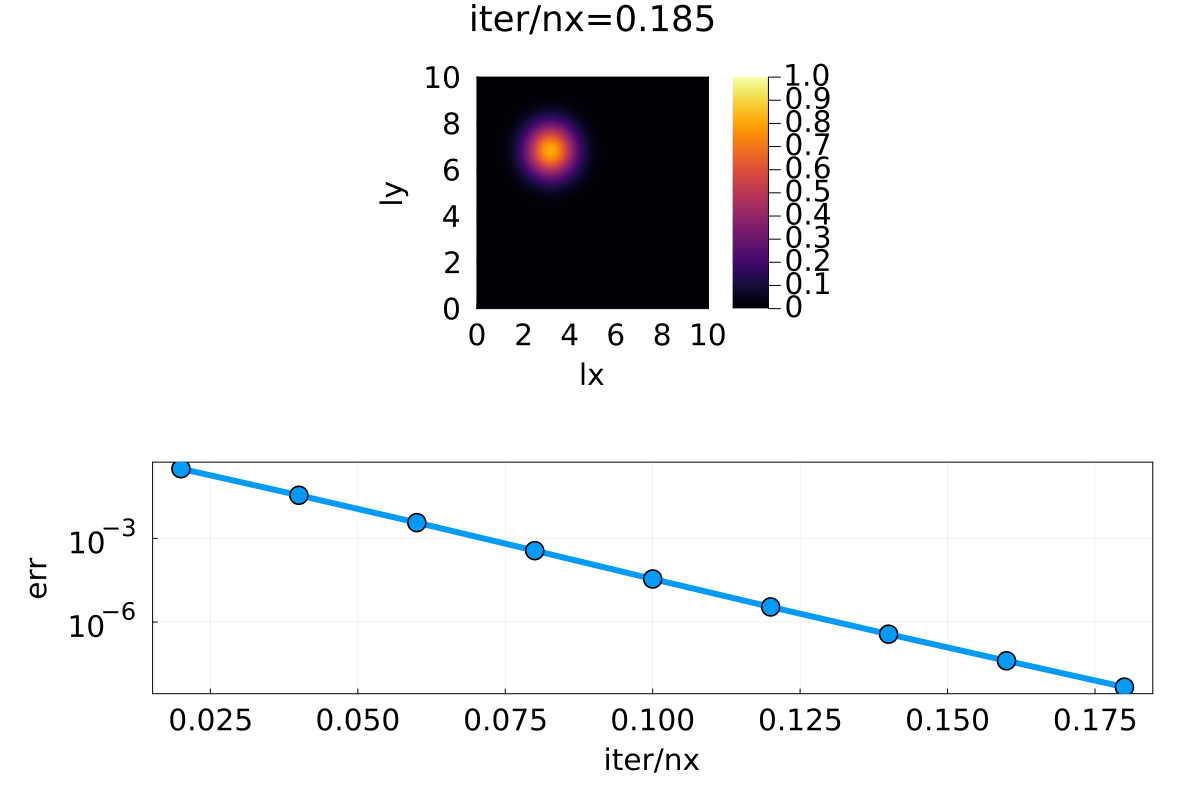

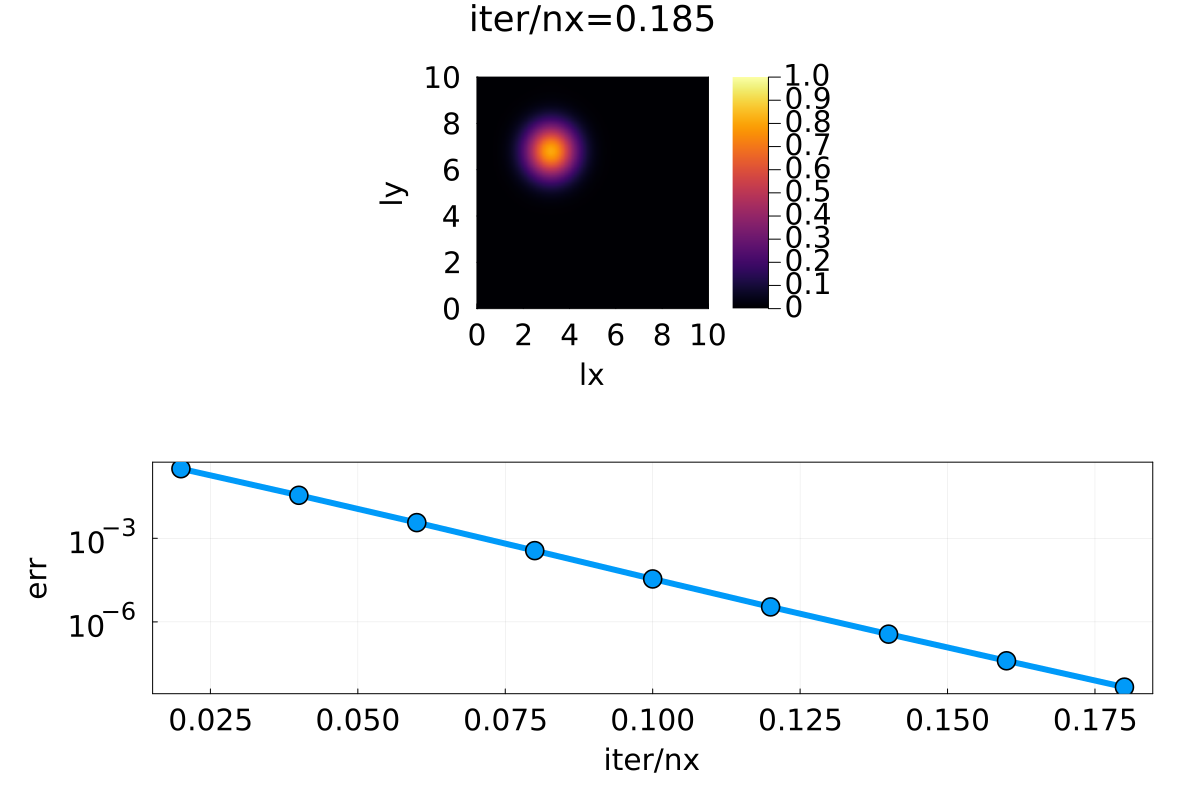

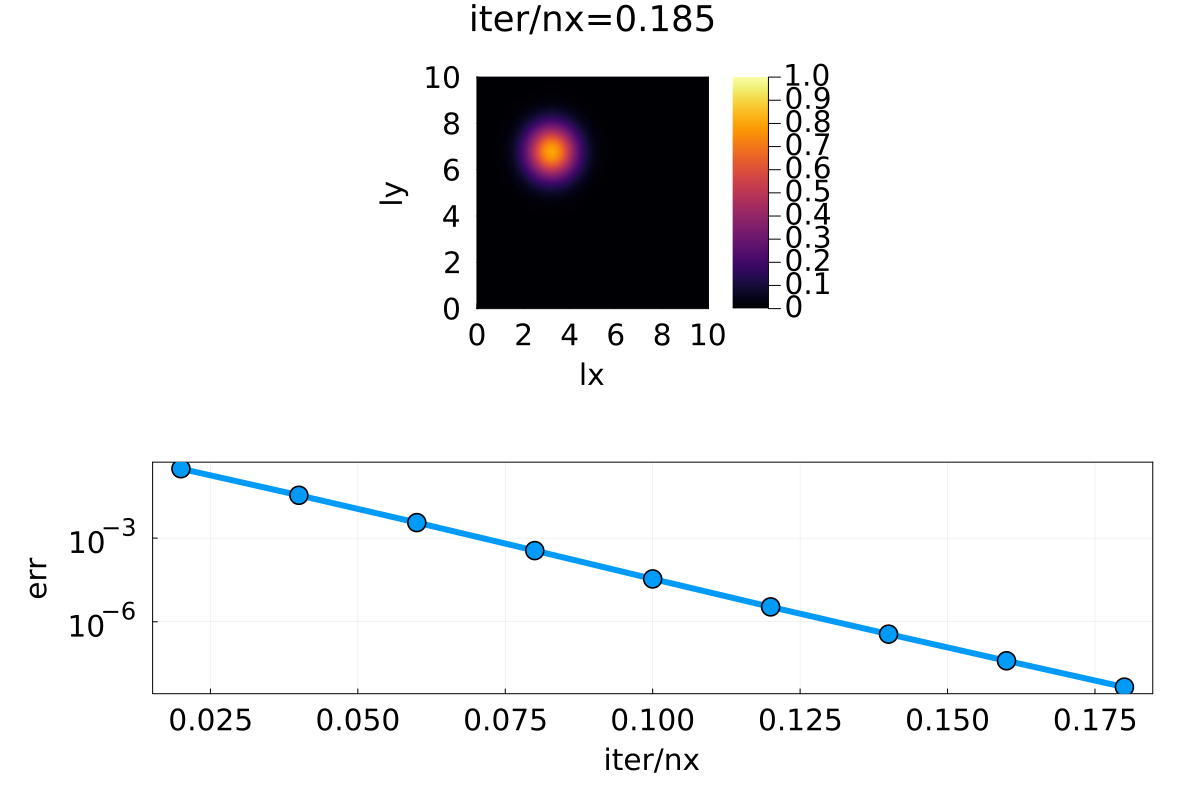

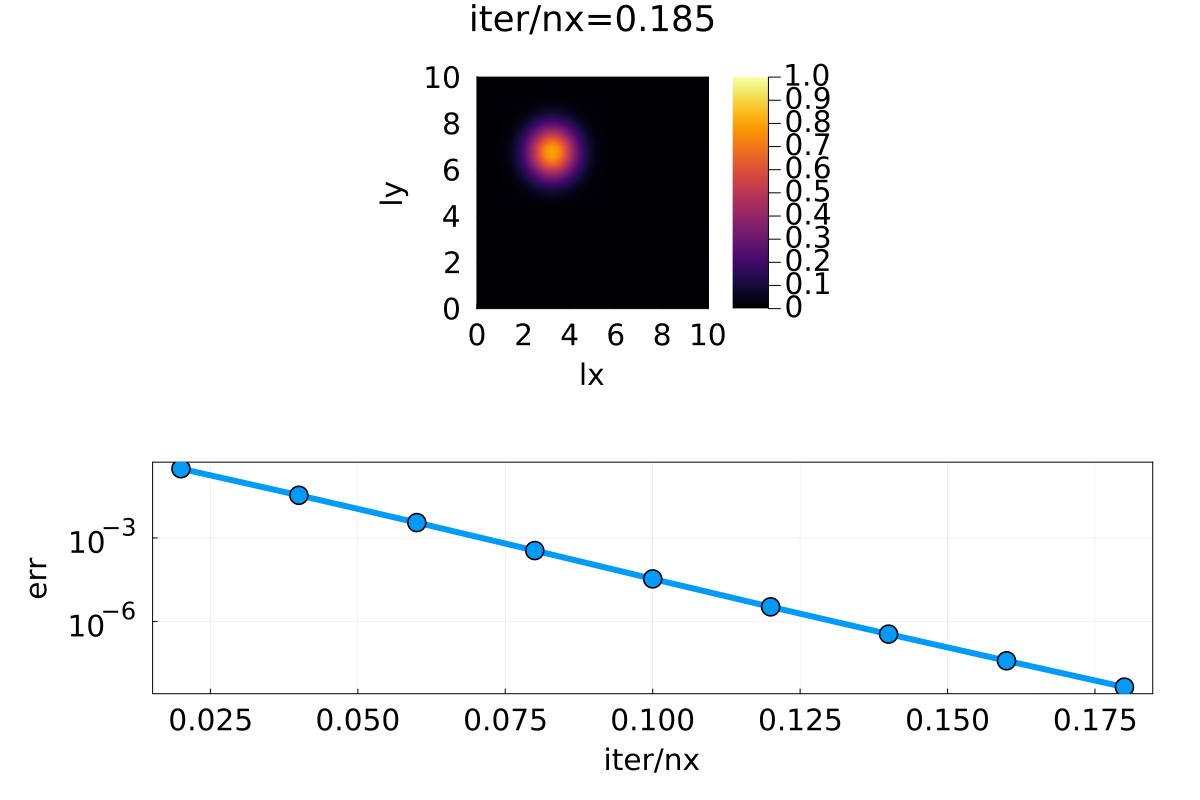

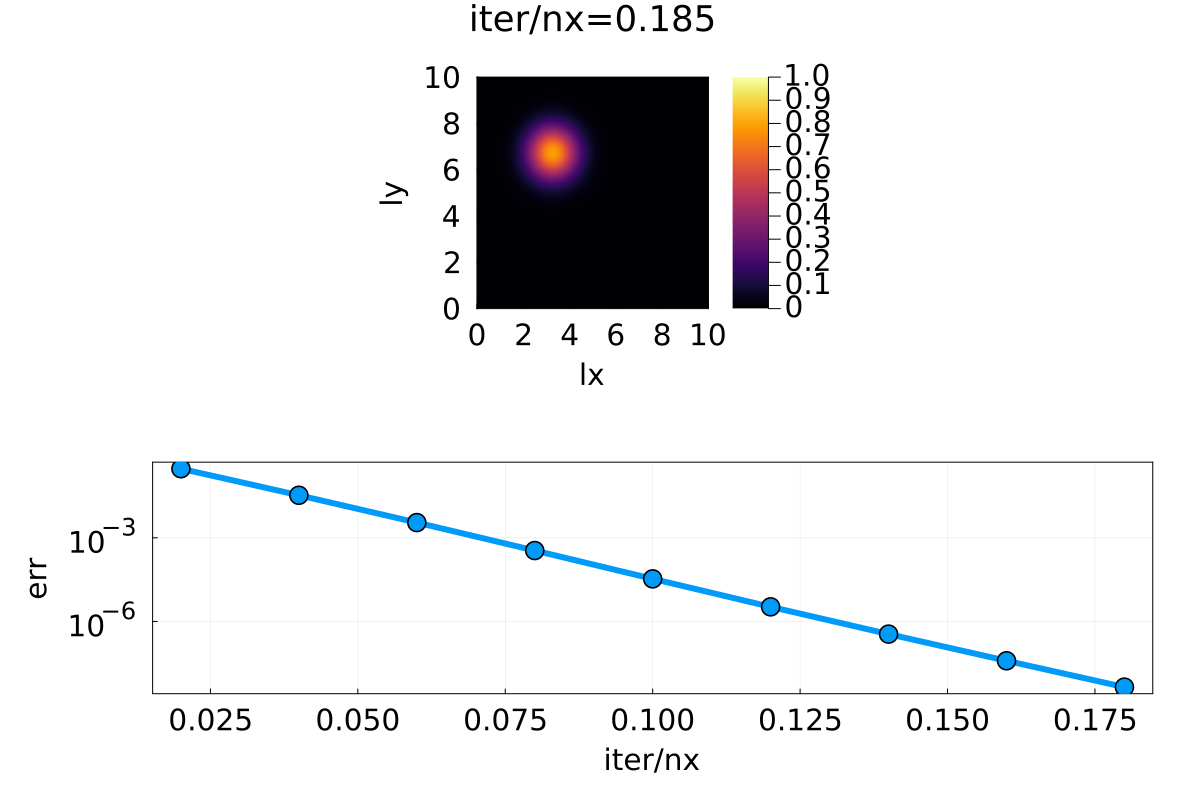

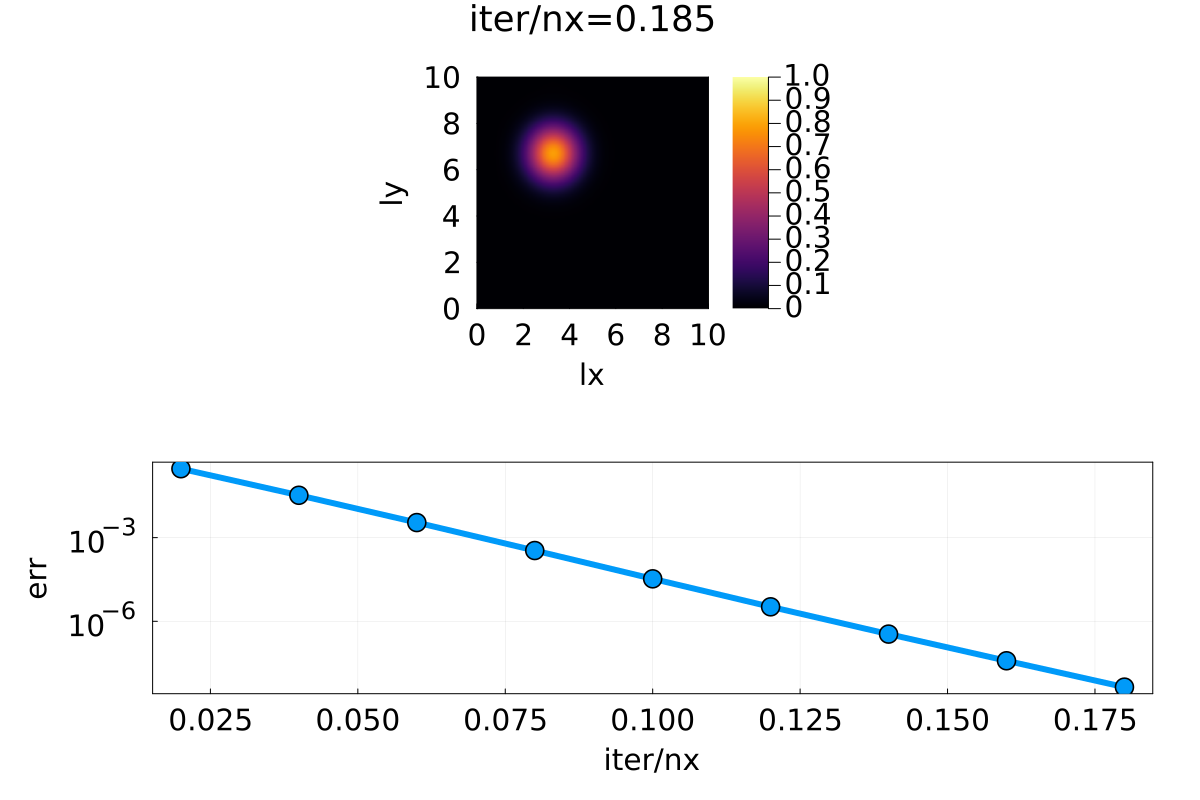

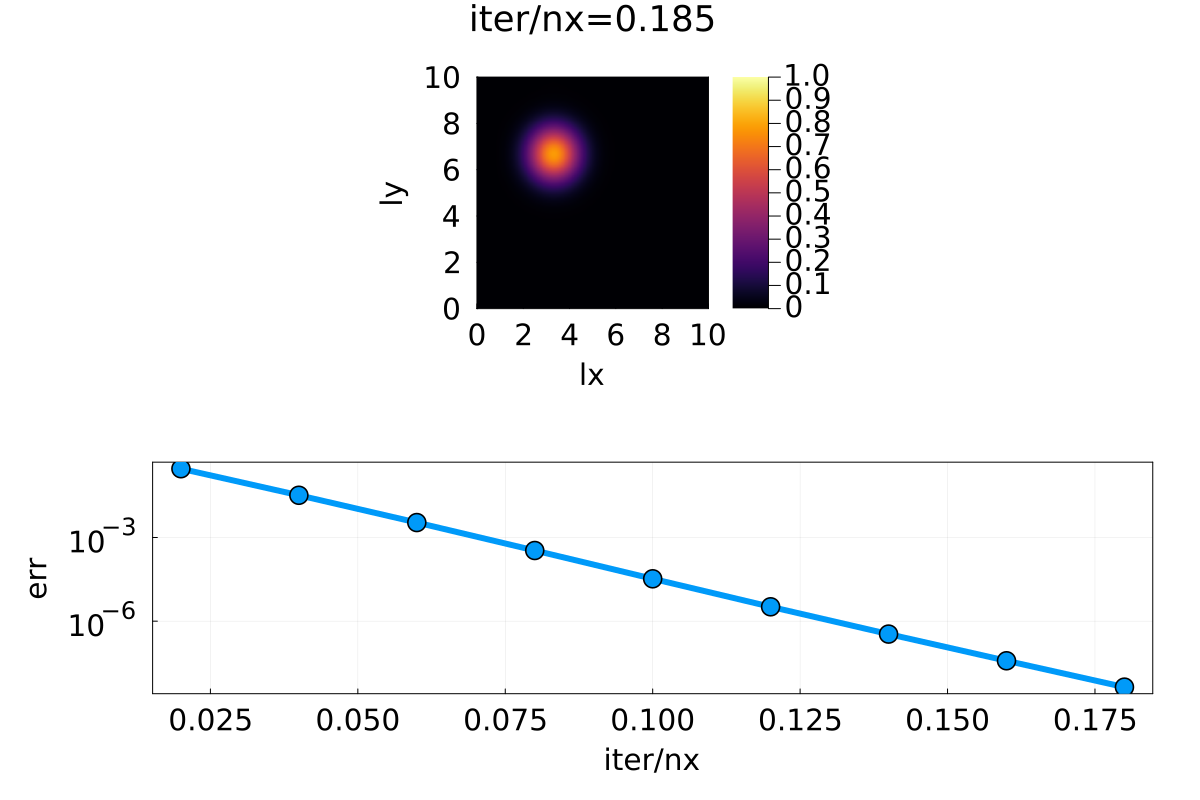

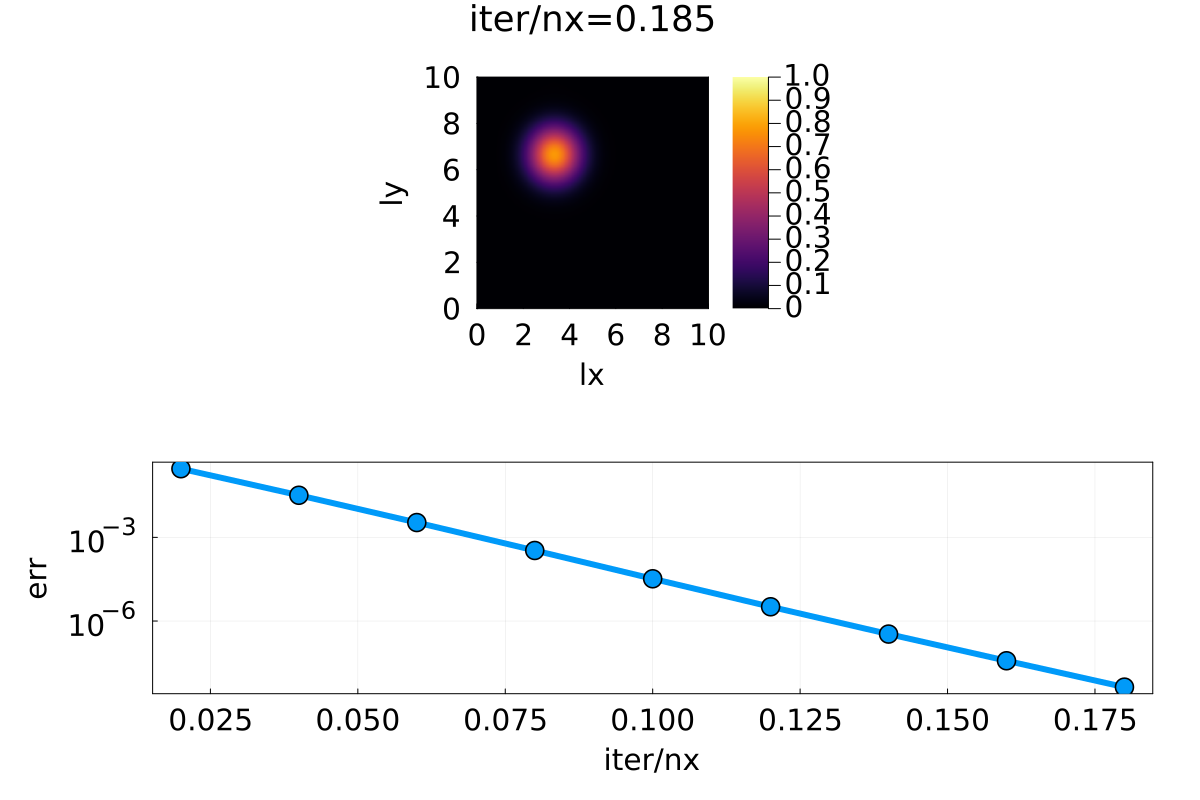

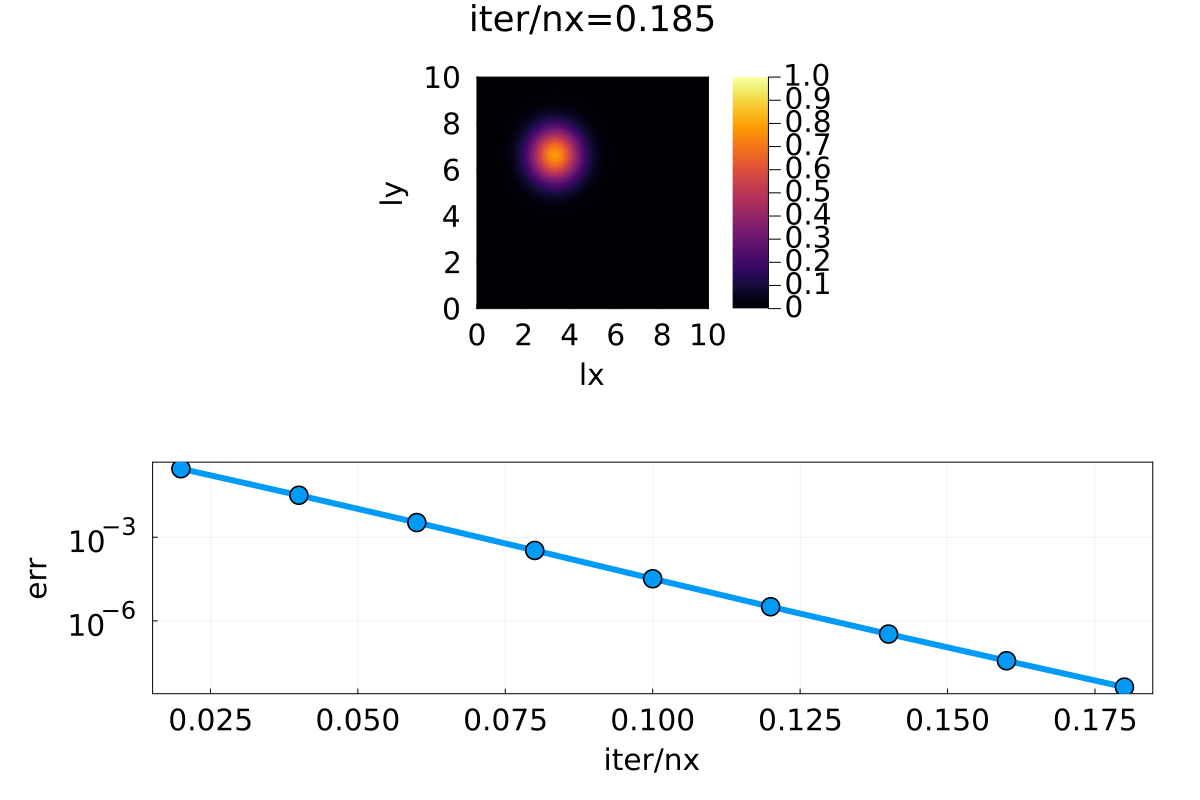

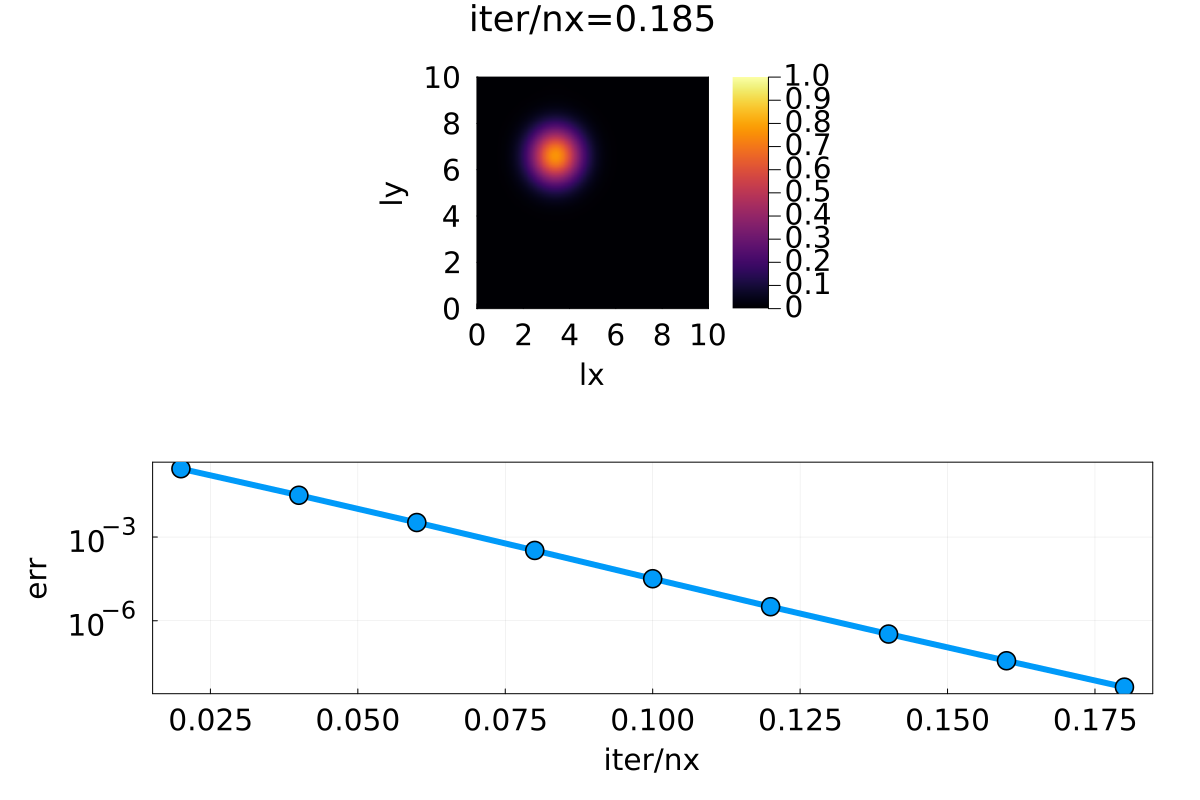

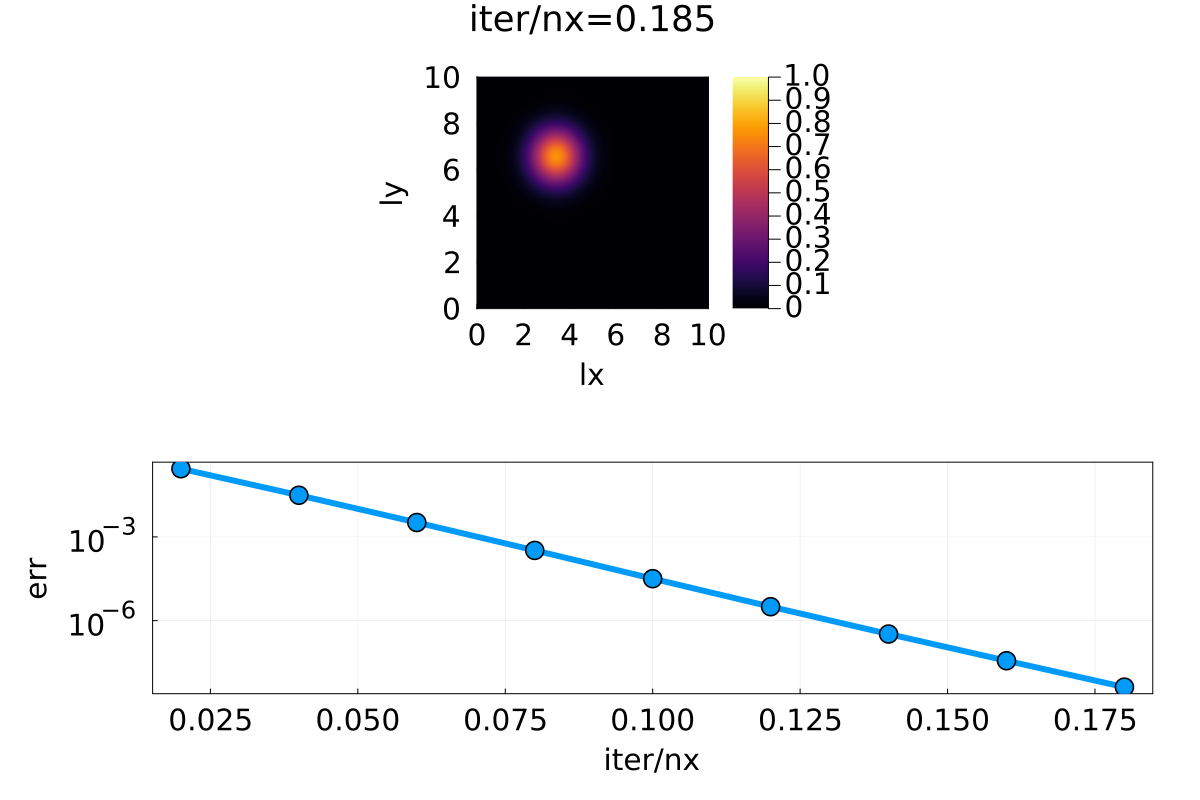

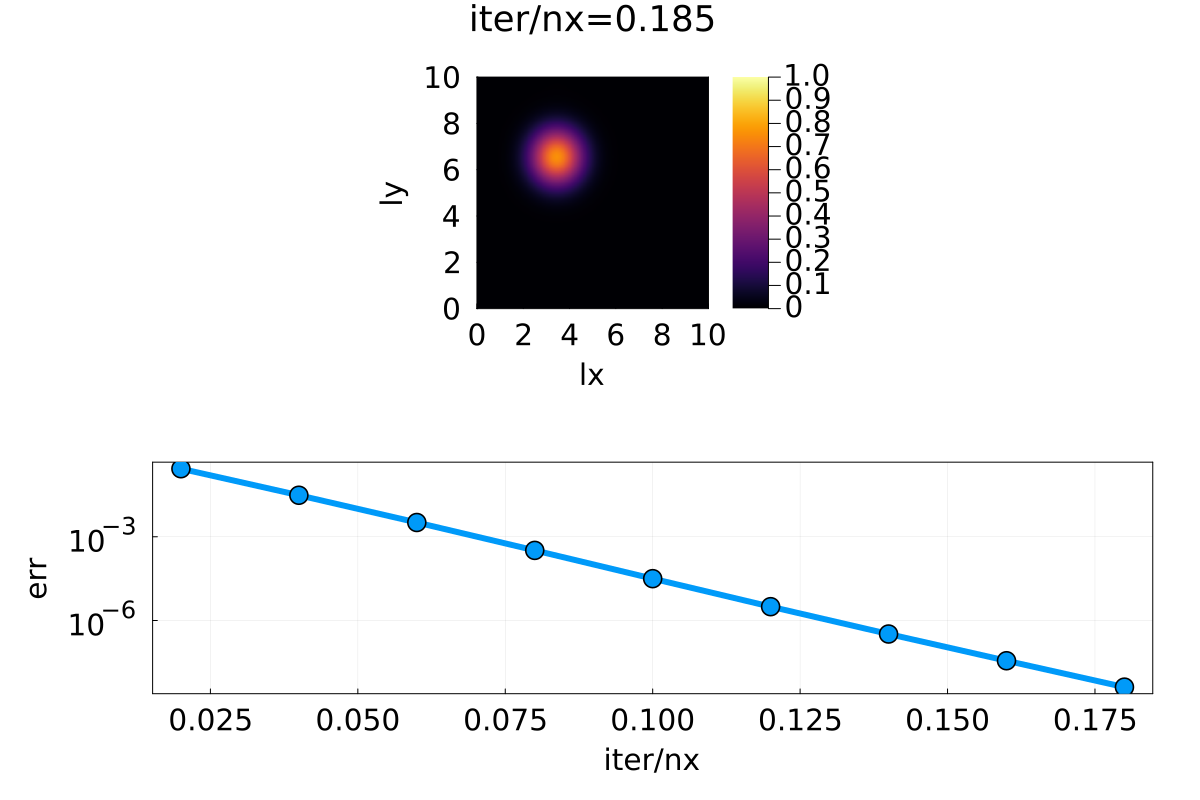

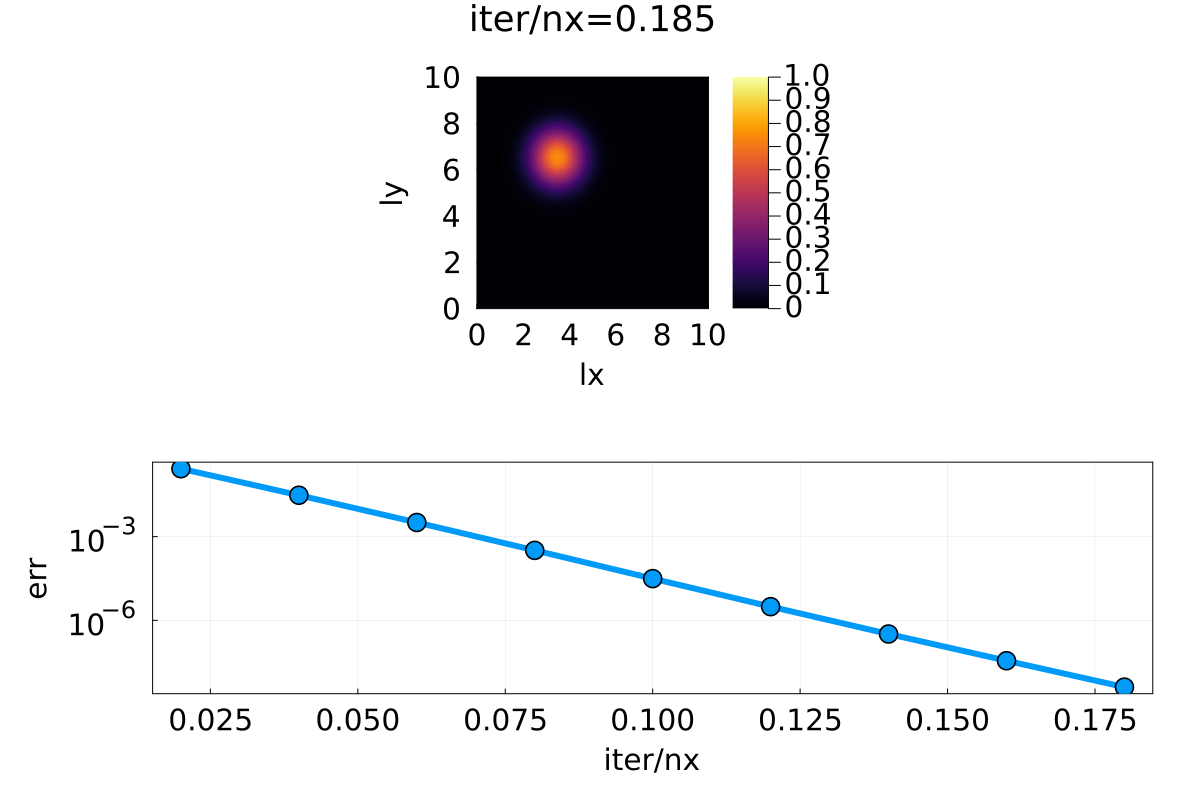

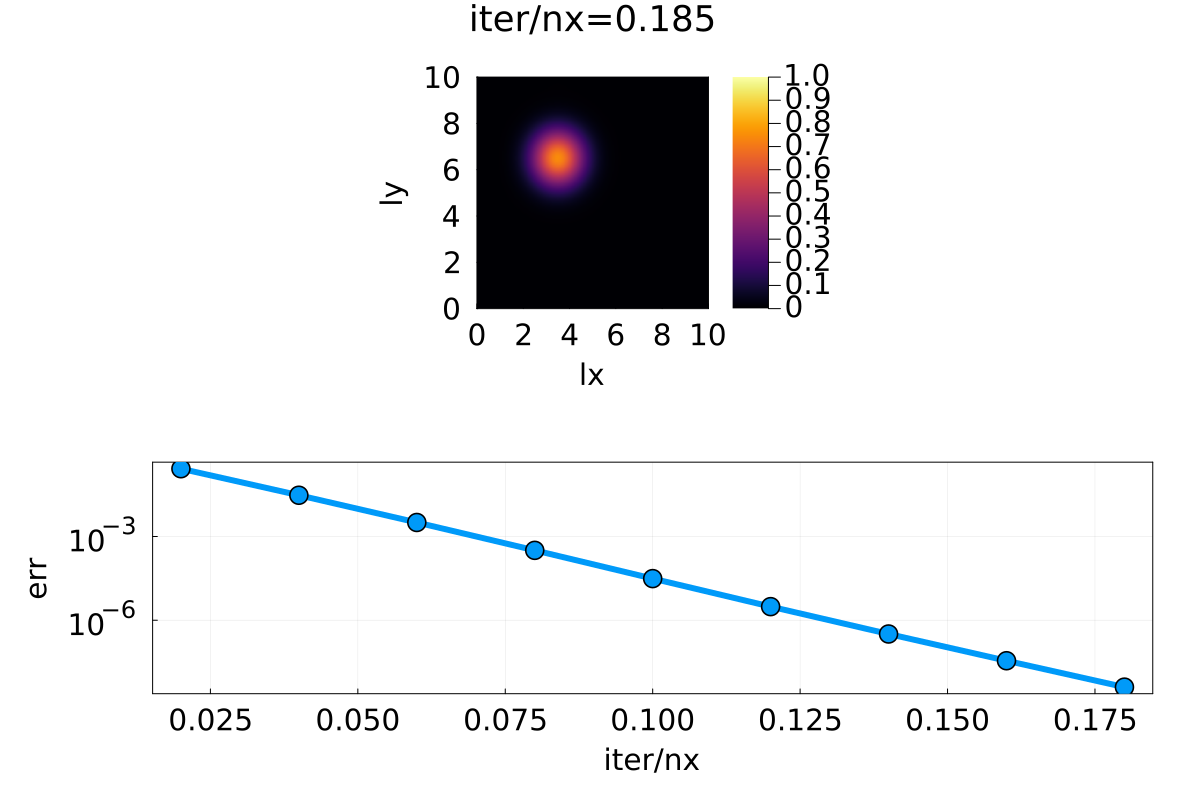

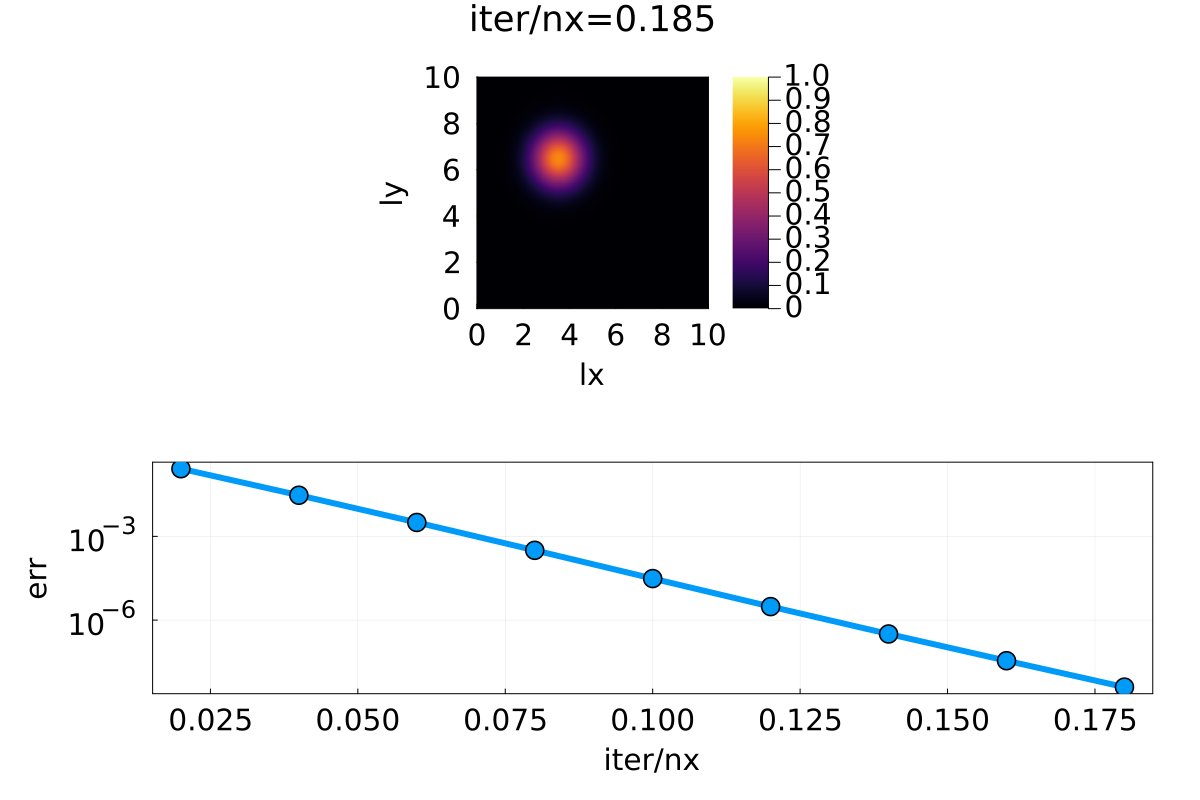

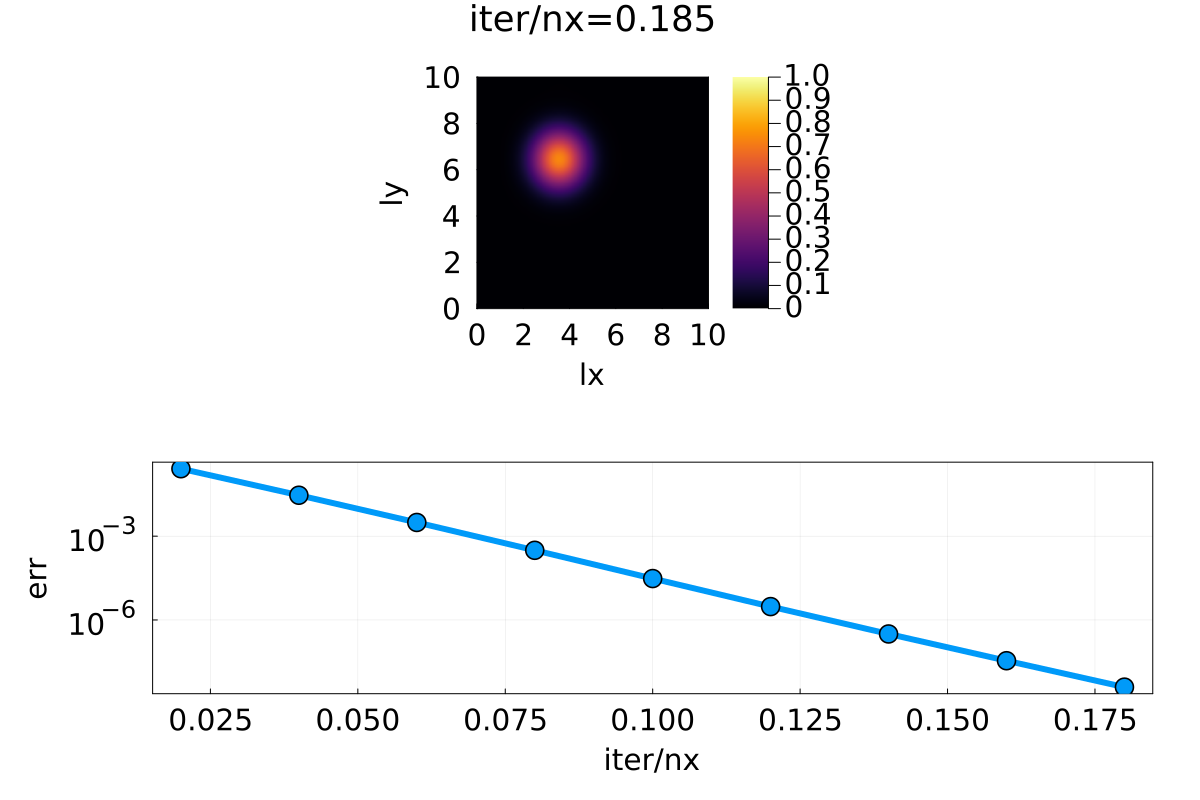

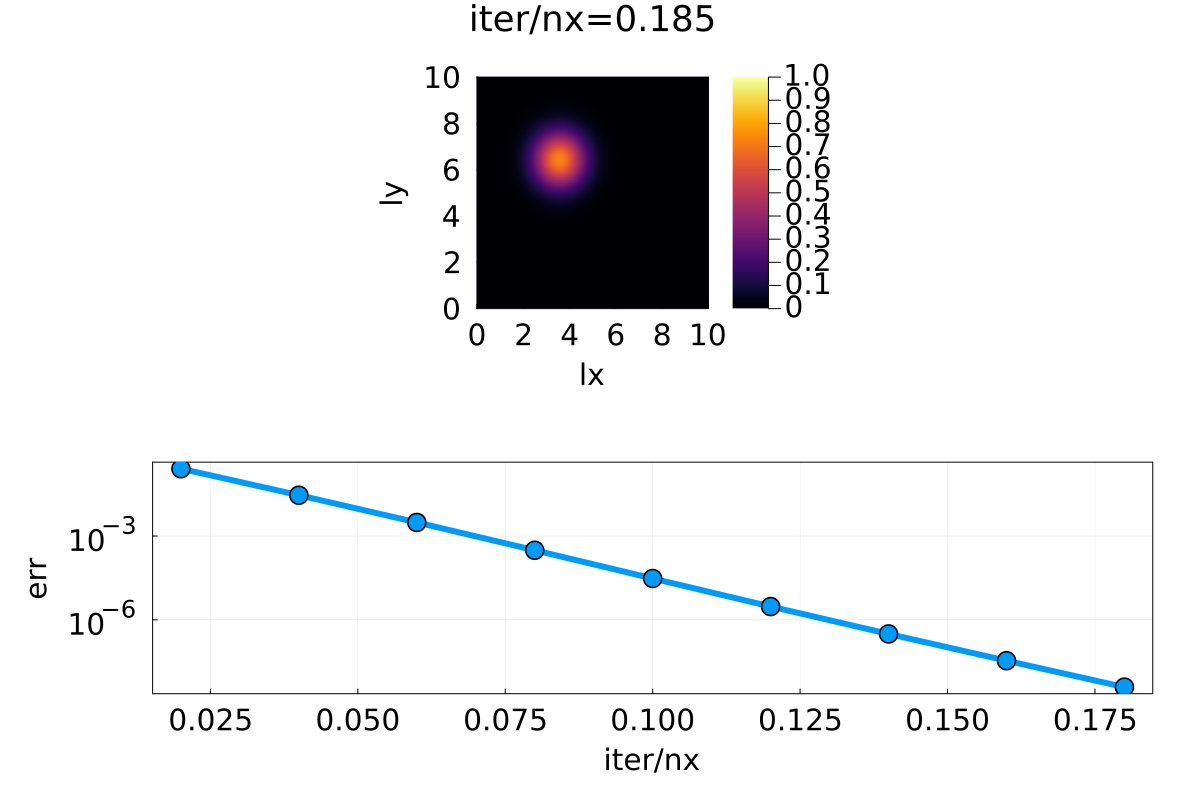

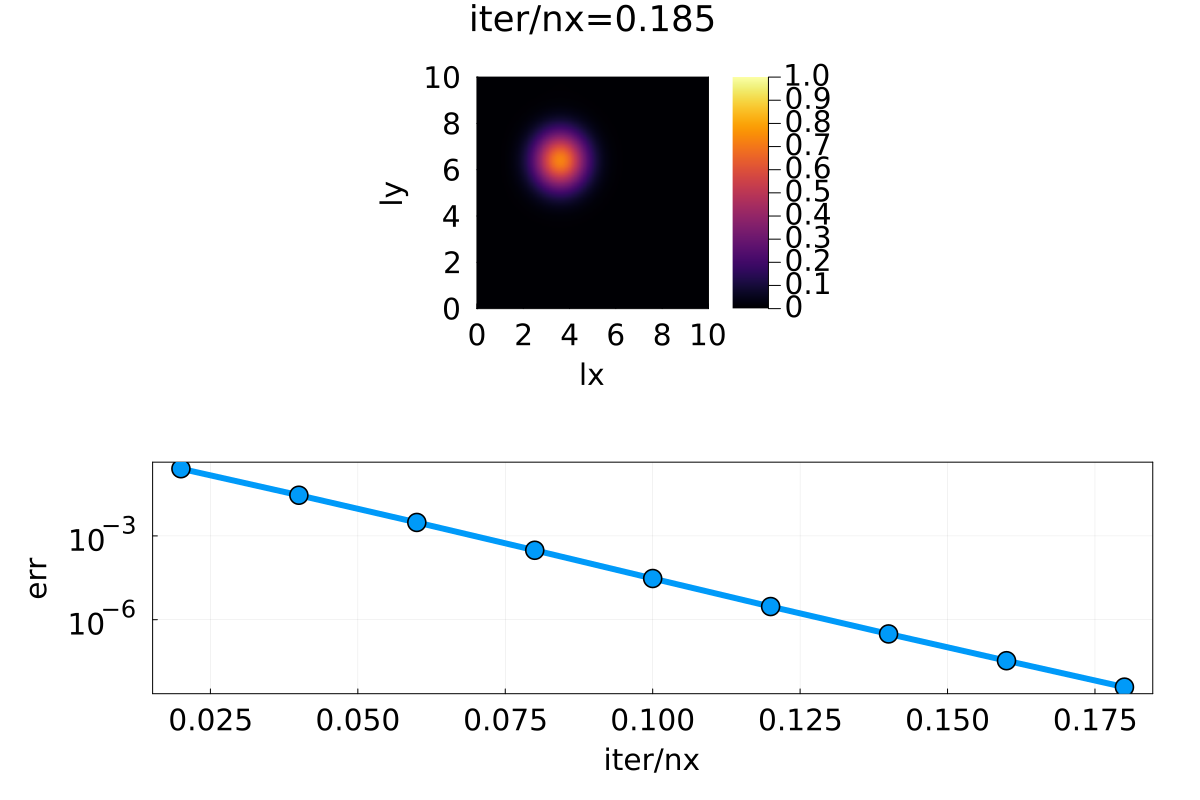

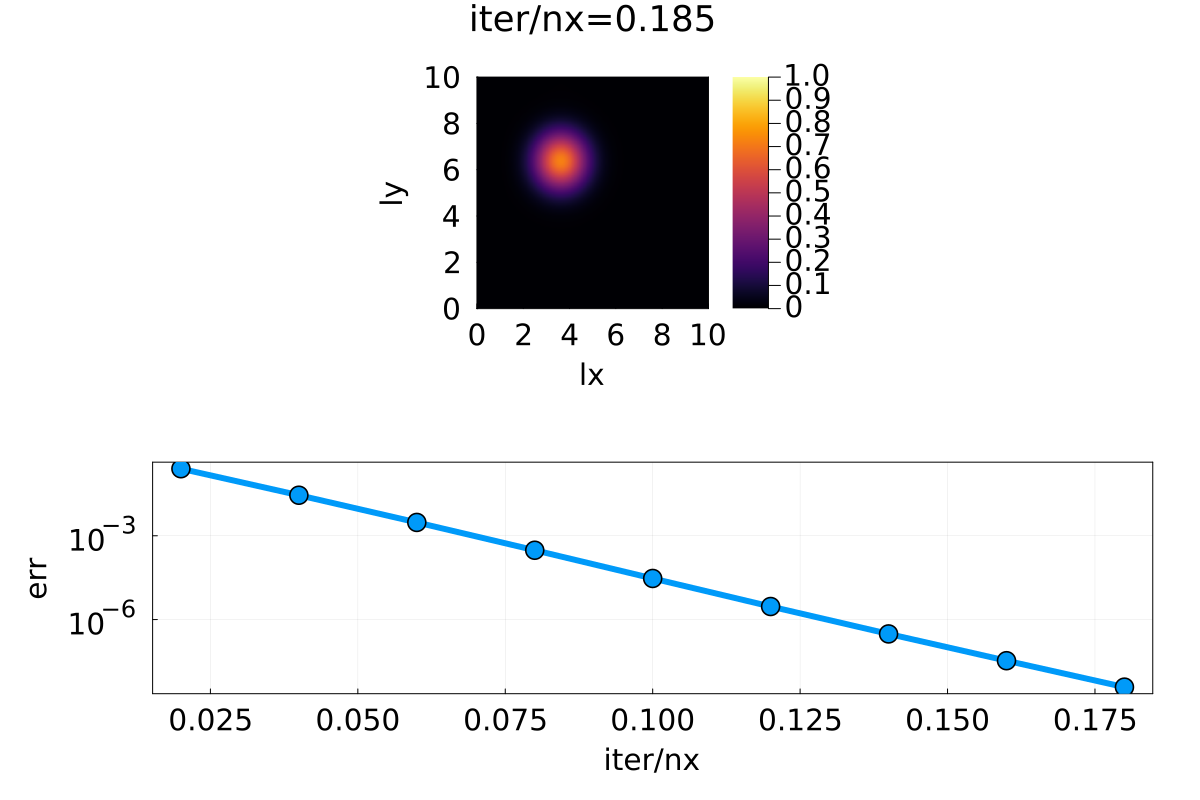

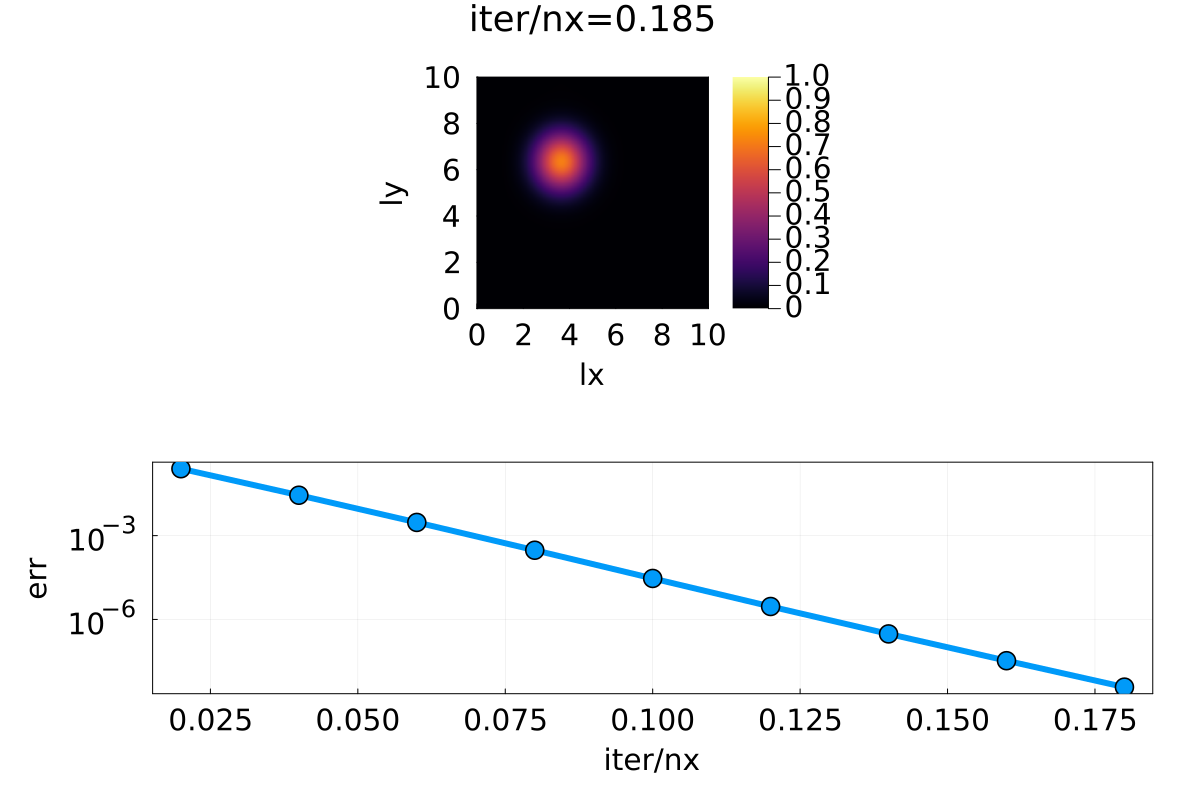

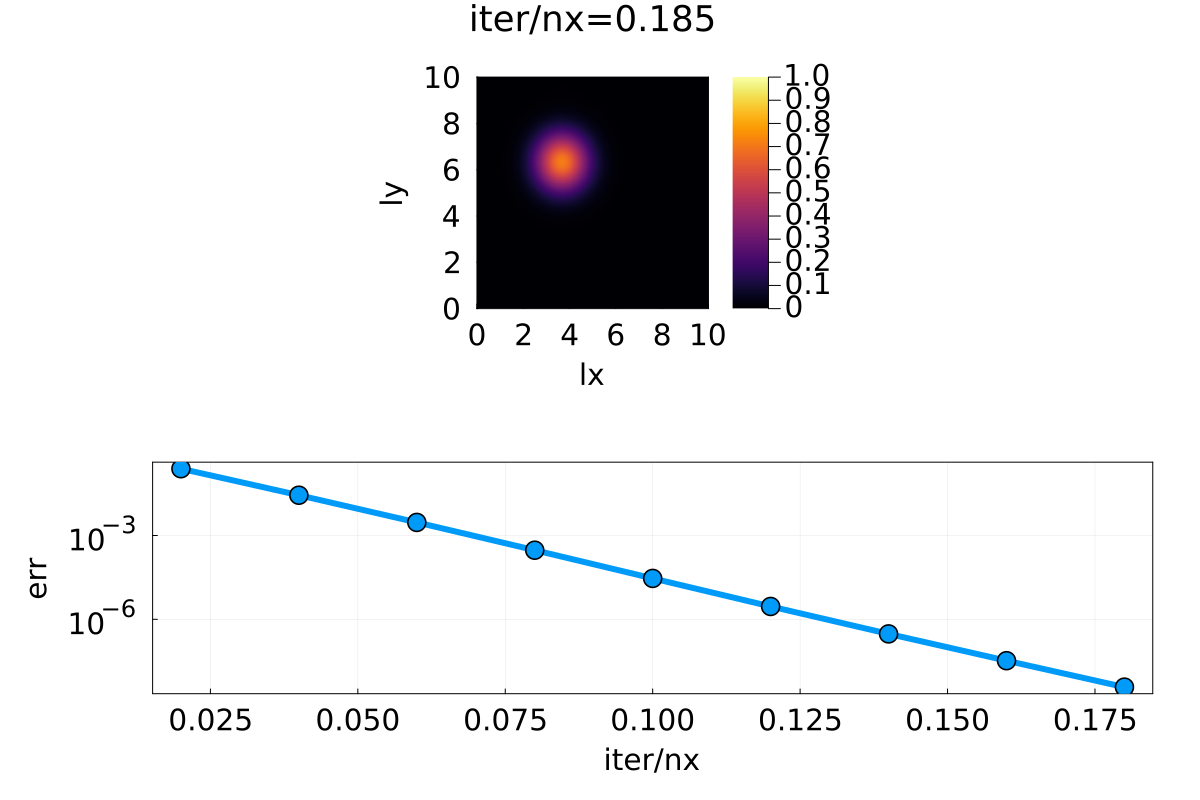

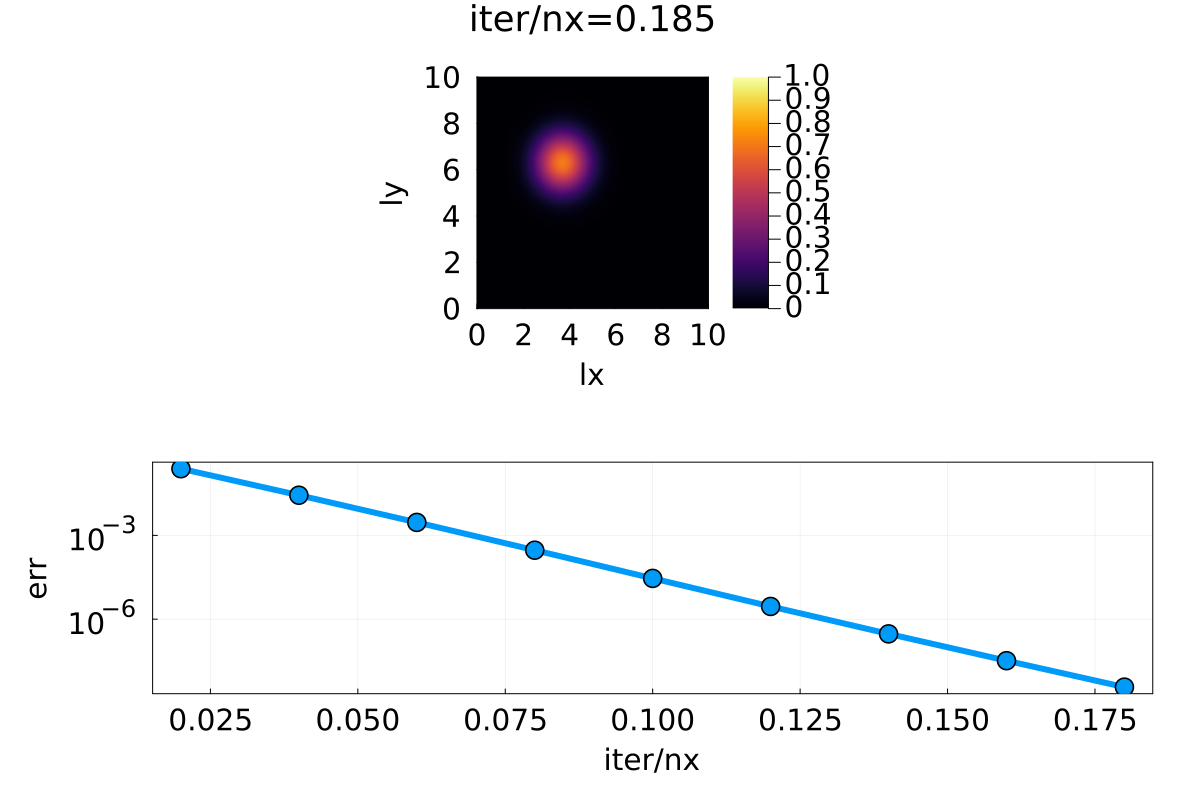

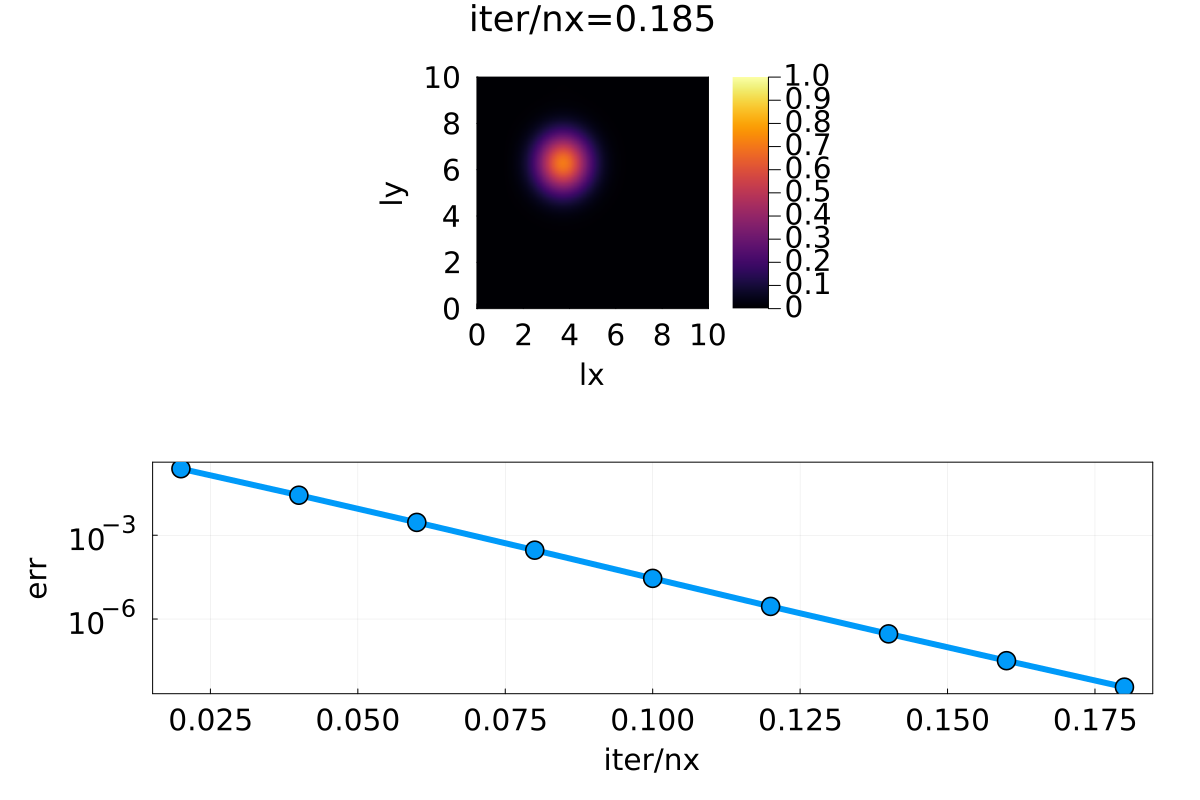

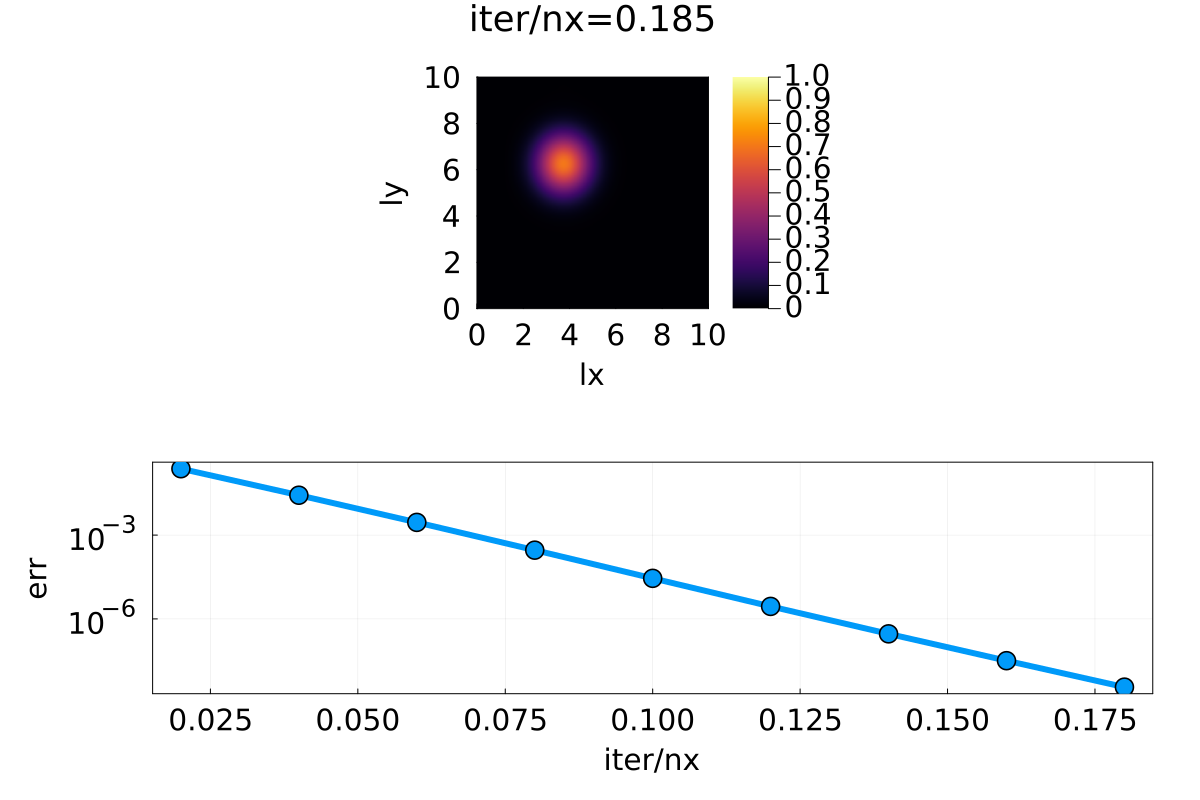

In [7]:
#Task 1
using Plots, Plots.Measures, Printf
default(size=(1200, 800), framestyle=:box, label=false, grid=false, margin=10mm, lw=6, labelfontsize=20, tickfontsize=20, titlefontsize=24)

@views function implicit_diffusion_2D()
    # physics
    lx,ly   = 10.0, 10.0
    dc      = 1.0
    da      = 1000
    vx      = 10.0
    vy      = -10.0
    # numerics
    nx,ny   = 200, 201
    ϵtol    = 1e-8
    maxiter = 10nx
    ncheck  = ceil(Int, 0.02nx)
    nt      = 50
    # derived numerics
    dx      = lx / nx
    dy      = lx / ny
    xc      = LinRange(dx / 2, lx - dx / 2, nx)
    yc      = LinRange(dy / 2, ly - dy / 2, ny)
    dt      = min(dx/abs(vx), dy/abs(vy))/2
    da      = lx^2/dc/dt
    re      = π + sqrt(π^2 + da)
    ρ       = (lx / (dc * re))^2
    dτ      = min(dx,dy)/sqrt(1/ρ)/sqrt(2)
    # array initialisation
    C       = @. exp(-(xc-lx/4)^2 -(yc'-3ly/4)^2) #200,201
    C_old   = copy(C)
    qx      = zeros(nx-1, ny  )
    qy      = zeros(nx  , ny-1)
    # time loop
    for it = 1:nt
        C_old .= C
        # iteration loop
        iter = 1; err = 2ϵtol; iter_evo = Float64[]; err_evo = Float64[]
        while err >= ϵtol && iter <= maxiter
            # time-dependant diffusion
            qx .-= dτ ./ (ρ .+ dτ / dc) .* (qx ./ dc .+ diff(C, dims=1) ./ dx) #199,201
            qy .-= dτ ./ (ρ .+ dτ / dc) .* (qy ./ dc .+ diff(C, dims=2) ./ dy) #200,200
            C[2:end-1,2:end-1] .-= dτ ./ (1.0 .+ dτ / dt) .* ((C[2:end-1,2:end-1] .- C_old[2:end-1,2:end-1]) ./ dt .+
                diff(qx[:,2:end-1], dims=1) ./ dx .+ diff(qy[2:end-1,:], dims=2) ./ dy)
            # error checking
            if iter % ncheck == 0
                err = maximum(abs.((C[2:end-1,2:end-1] .- C_old[2:end-1,2:end-1]) ./ dt .+ diff(qx[:,2:end-1], dims=1) ./ dx .+ diff(qy[2:end-1,:], dims=2) ./ dy))
                push!(iter_evo, iter / nx); push!(err_evo, err)
            end
        iter += 1
        end
        # advection (explicit)
        C[2:end,:] .-= dt * max(vx, 0.0) .* diff(C, dims=1) ./dx
        C[2:end,:] .-= dt * min(vx, 0.0) .* diff(C, dims=1) ./dx
        C[:,2:end] .-= dt * max(vy, 0.0) .* diff(C, dims=2) ./dy
        C[:,2:end] .-= dt * min(vy, 0.0) .* diff(C, dims=2) ./dy
        # visualisation
        p1 = heatmap(xc, yc, C'; xlims=(0, lx), ylims=(0, ly), clims=(0, 1), aspect_ratio=1,
            xlabel="lx", ylabel="ly", title="iter/nx=$(round(iter/nx,sigdigits=3))")
        p2 = plot(iter_evo, err_evo; xlabel="iter/nx", ylabel="err",
            yscale=:log10, grid=true, markershape=:circle, markersize=10)
        display(plot(p1, p2; layout=(2, 1)))
    end
end

implicit_diffusion_2D()